Copyright and License
© 2026, Jaime Rodríguez Membrive

This Jupyter Notebook is licensed under the MIT License.

Disclaimer:

- This notebook is provided “as is”, without warranty of any kind, express or implied.
- The author assumes no responsibility or liability for any errors, omissions, or outcomes resulting from the use of this notebook or its contents.
- All analyses and interpretations are for educational and research purposes only and do not constitute medical or clinical advice.

Dataset Note:

This project is built upon a high-fidelity synthetic dataset, meticulously engineered to mirror the deterministic physical relationships and stochastic behaviors inherent in real-world mobile networks

---

# 0. Abstract: AI-driven Optimization actions classifier

As mobile networks transition toward 5G-Advanced and 6G architectures, the exponential growth in densification and traffic complexity has rendered traditional, manual optimization processes economically and technically unsustainable. Mobile Network Operators currently face the dual challenge of maintaining stringent Quality of Service (QoS) standards while managing escalating operational expenditures (OPEX). In this context, AI-driven network optimization—specifically automated action classification—emerges as a critical tool for survival and competitiveness.

By replacing reactive, human-led interventions with proactive, data-driven intelligence, operators can achieve a level of precision in Radio Access Network (RAN) management that was previously impossible. This use case is highly relevant as it addresses the core of the subscriber experience: ensuring seamless handovers, maximizing throughput, and eliminating coverage "holes" through intelligent parameter adjustments.

The implementation of an AI action classifier allows for the immediate identification of optimal corrective measures—whether logical adjustments like load balancing or physical changes like antenna tilt—at a scale of thousands of cells simultaneously.

The benefits for real-world networks are multiple:
- Beyond the immediate improvement in Key Performance Indicators (KPI), operators gain significant efficiency by automating routine troubleshooting, allowing engineering teams to focus on high-level strategic planning.
- Furthermore, by optimizing existing hardware assets more effectively, AI-driven classification extends the lifecycle of current infrastructure and deferrals of capital expenditure (CAPEX).
- Ultimately, this transition to autonomous, self-optimizing networks is the primary driver for reducing churn and securing the high-reliability connectivity required for the next generation of digital services.

# 1. Executive Summary

This project develops an AI-driven classifier for mobile network optimization actions, addressing the critical need for automated decision-making in increasingly complex 5G-Advanced and 6G network environments. As manual optimization processes become economically and technically unsustainable, this work demonstrates how machine learning can enable proactive, data-driven network management at scale.

## What is Done

The study implements a comprehensive machine learning pipeline to classify optimal network optimization actions based on Key Performance Indicators (KPIs) from mobile network cells. Using a high-fidelity synthetic dataset that mirrors real-world network behaviors, the classifier learns to recommend specific corrective measures—ranging from logical parameter adjustments (load balancing, handover optimization) to physical interventions (antenna tilt modifications) based on current network conditions.

## How it is Done

The methodology follows a systematic approach encompassing data quality assessment, exploratory data analysis, feature engineering, and multi-model evaluation. The pipeline processes 14 network variables including cell load, signal quality metrics (RSRP, SINR, CQI), handover performance indicators, and contextual neighbor information. Multiple machine learning approaches are evaluated, including ensemble methods (Random Forest, XGBoost), deep learning architectures with dropout and batch normalization, and voting classifiers to capture complex non-linear relationships between network states and optimal actions.

The analysis incorporates domain-specific preprocessing strategies that preserve critical "edge cases" which often trigger specific network interventions, ensuring the model learns from operationally relevant scenarios rather than sanitized data distributions.

## Best Model Performance

Through comprehensive model comparison and hyperparameter optimization, the ensemble-based approach emerged as the optimal solution, demonstrating superior performance in accurately classifying network optimization actions across diverse operational scenarios. The final model successfully balances accuracy with interpretability, making it suitable for deployment in production network management systems where decision transparency is crucial for operator confidence and regulatory compliance.

This AI-driven approach enables Mobile Network Operators to achieve unprecedented precision in Radio Access Network management, supporting the transition toward autonomous, self-optimizing networks essential for next-generation connectivity services.

---

# 2. Analytical framework design

## 2.1 Analysis Process Overview

This notebook follows a systematic machine learning pipeline for developing a network actuator classifier

### Step 1: Environment Setup
- **Libraries Import**: Loading essential Python libraries including pandas for data manipulation, scikit-learn for machine learning algorithms, and TensorFlow/Keras for deep learning models.
- **Configuration**: Setting visualization parameters and suppressing warnings for cleaner output.

### Step 2: Data Ingestion
- **Dataset Loading**: Reading the synthetic network KPI dataset from parquet format.
- **Initial Exploration**: Examining the first rows to understand data structure and variable types.

### Step 3: Data Quality Assessment
- **Structural Analysis**: Using df.info() to verify data types, memory usage, and completeness.
- **Missing Values Check**: Confirming zero missing values across all 14 variables.
- **Descriptive Statistics**: Computing summary statistics (mean, std, min, max, quartiles) for all numeric features.

### Step 4: Data Cleaning & Preprocessing
- **Outlier Detection**: Identifying and handling anomalous values using percentile-based clipping methods.
- **Data Type Optimization**: Converting variables to appropriate types for memory efficiency.
- **Temporal Features**: Extracting time-based features (hour, day of week) from timestamp data.

### Step 5: Exploratory Data Analysis (EDA)
- **Univariate Analysis**
- **Distributional Shift**
- **Target Class Balance**
- **Multivariate Separation**
- **Feature Importante via Mutual Information**
- **Decision Boundaries**

### Step 6: Data Preparation for Modeling
- **Feature Selection**: Identifying relevant predictors based on domain knowledge and statistical analysis.
- **Train-Test Split**: Partitioning data into training and testing sets (typically 80-20 split).
- **Label Encoding**: 
- **Class balancing**: 

### Step 7: Models Development & Evaluation
- **Baseline Model**: Implementing Linear Regression as a benchmark for comparison.
- **Ensemble Methods**: Training Random Forest Regressor to capture non-linear relationships.
- **Deep Learning**: Developing Neural Network architectures with multiple hidden layers, dropout, and batch normalization.


### Step 8: Model Comparison
- **Comparative Analysis**: Evaluating all models against consistent metrics.
- **Trade-off Assessment**: Balancing accuracy, interpretability, and computational efficiency.
- **Final Model Selection**: Choosing the optimal model for deployment based on business requirements.

### Step 9: Results Interpretation & Recommendations
- **Business Insights**: Translating model outputs into actionable network optimization strategies.
- **Deployment Considerations**: Discussing integration with existing network management systems.
- **Future Improvements**: Identifying opportunities for model enhancement and additional features.

---

# 3. Data source and ethical considerations

This project utilizes a synthetic dataset meticulously labeled by senior radio optimization engineer to reflect standard operational procedures for each scenario.

To ensure data integrity and privacy, the following ethical safeguards are in place:

- Anonymization: No personal or user equipment identifiers (UEIs) are included.

- Privacy Protection: No attempts are made to re-identify individuals.

- Granularity: All analyses are performed strictly at the network element level.

# 4. Setup & Library Imports

## 4.1 Libraries Overview

This analysis leverages several key Python libraries, each serving specific purposes in the machine learning pipeline:

---

In [30]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Reshape, Conv2D, MaxPooling2D
import shap

In [36]:
df_x = pd.read_parquet('/home/erodrja/df_qvalues.parquet')

In [37]:
df_x

nci          cell reward_component    action_0   action_1  \
0      1401232607  05DJ68GEK2U5           legacy   36.843876  20.974487   
1      4124413619  05DJ68GEOQ9Y           legacy   48.887146  28.396645   
2      1756973020  05DJ68GEXPOE           legacy   33.708950  16.216908   
3      5735694811  088L1IPR0M29           legacy   -5.737971   2.496511   
4      3667569508  088L1IPR2HFI           legacy   21.060591   6.635062   
...           ...           ...              ...         ...        ...   
10915   911321096  ZX4ZQPL7OVK4            xrf_b   84.845406  47.340572   
10916  7250582652  ZX4ZQPL7T4A7            xrf_b   31.856163  34.648891   
10917  1360900720  ZZEB2Z6I49VA            xrf_b    4.605480  -1.048586   
10918  3467413428  ZZEB2Z6IF6Z2            xrf_b  100.898689  -4.897768   
10919  7070504625  ZZEB2Z6IZ701            xrf_b   77.902191   3.342848   

        action_2   action_3    action_4   action_5   action_6  ...  action_15  \
0      28.635656  30.366030   99.437386  25.865238  19.231764  ...  32.011944   
1      29.698700  27.305147  100.071732  38.688431  18.583876  ...  36.211662   
2      -2.104207  -8.478394   41.327686  29.873028   3.764427  ...   7.367433   
3       1.391255   4.109999   -2.949338  -9.846878  -1.918704  ...  -5.075710   
4      -3.307145  -5.049204   20.648064   8.727007  -1.095484  ...  22.522497   
...          ...        ...         ...        ...        ...  ...        ...   
10915   7.147485   4.326482   49.165848  60.807037  88.481781  ...  64.762428   
10916   0.603768  -3.722496   26.623655  35.184444  40.711552  ...  33.806522   
10917  -1.110291  -0.451696    1.246441   4.055582   3.723796  ...   6.392266   
10918  60.490490  40.938534   63.067173  94.354683  93.712631  ...  46.791462   
10919  37.874161  21.702452   54.197353  80.789558  65.468544  ...  42.597816   

       action_16  action_17  action_18  action_19  action_20  action_21  \
0      30.575413  33.114120  45.208164  89.145058  45.847916  35.825741   
1      47.037567  31.462986  38.015083  71.535240  54.136356  25.730028   
2      22.619532  19.453815   9.266912  23.160414  12.132440   3.505928   
3      -6.534876  -0.528139   4.342933  -1.310458 -25.002186 -12.725466   
4       7.561678   7.092239  17.909410  14.210949  15.647525  -0.928570   
...          ...        ...        ...        ...        ...        ...   
10915  58.009377  62.124367  39.100506  30.824501  69.227356  66.344604   
10916  44.778416  22.829796  27.067583  14.754654  53.780304  62.205269   
10917  10.754147   4.239863   6.685769   8.816780  11.497507   9.224193   
10918  32.660084  65.178337   8.364282  96.090477  38.091259  32.346119   
10919  27.005337  58.060486  16.768023  62.587788  43.463879  32.990330   

       action_22  action_23   action_24  
0      37.349625  57.073963   98.886040  
1      41.402779  44.145786   83.945961  
2      -6.012774   3.630880   10.853481  
3       0.611010   3.182429    0.196947  
4      13.079235   7.111475   22.167973  
...          ...        ...         ...  
10915   0.110921  -0.053142   47.621696  
10916  16.924124 -10.618235   17.688267  
10917   2.357175  -0.368631    5.529955  
10918 -33.658226  46.798965  107.719917  
10919 -12.046670  42.259552   81.970085  

[10920 rows x 28 columns]

In [33]:
df_x.to_csv('aas_output_it2.csv')

# 5. Data Ingestion

In [2]:
dataset = pd.read_parquet('../dataset/network_cells_labeled_actions.parquet')

In [3]:
dataset.columns.tolist()

['Cell_ID',
 'Day_of_Year',
 'Hour',
 'A3Offset_dB',
 'crsGain_dB',
 'LB_Threshold_Delta',
 'Tilt_Deg',
 'Cell_Load',
 'AVG_CELL_LOAD_NEIGHBORS',
 'AVG_TILT_NEIGHBORS',
 'TIMING_ADVANCE_90th',
 'RSRP',
 'SINR',
 'CQI',
 'HOSR',
 'HO_Too_Late_Ratio',
 'HO_Too_Early_Ratio',
 'Accessibility',
 'DL_Throughput',
 'Actions_List',
 'Primary_Action']

In [4]:
dataset.head(10)

Cell_ID  Day_of_Year  Hour  A3Offset_dB  \
0  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            1     0          4.0   
1  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            2     1          6.0   
2  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            3     2          3.0   
3  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            4     3          6.0   
4  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            5     4          6.0   
5  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            6     5          2.0   
6  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            7     6          3.0   
7  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            8     7          3.0   
8  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e            9     8          3.0   
9  e13c69a8-ae20-40f0-89e2-cbc0a6156a9e           10     9          6.0   

   crsGain_dB  LB_Threshold_Delta  Tilt_Deg  Cell_Load  \
0           0           30.026185         8  76.335048   
1           3           41.771701        11  71.967776   
2           3           22.744835         4  45.558953   
3           6           19.091880         0  22.871731   
4          -3           30.086055         2  10.666745   
5          -3           27.758874         4  24.326634   
6          -3           23.235388         7  98.927113   
7           0           15.940030         5  74.831776   
8           0           26.705997         9  61.268424   
9           6           22.055786        12  31.508061   

   AVG_CELL_LOAD_NEIGHBORS  AVG_TILT_NEIGHBORS  ...        RSRP       SINR  \
0                88.608258                  10  ...  -95.923745  10.435888   
1                72.957969                  10  ... -101.665360   3.219431   
2                28.899258                  12  ...  -91.751024  10.881770   
3                70.468589                   6  ...  -85.147787   5.502497   
4                35.466119                   4  ...  -95.077233  14.364359   
5                46.632077                  11  ... -104.331897   7.758864   
6                93.318789                   7  ...  -98.602547   5.951122   
7                77.828099                   8  ...  -97.194388   6.063824   
8                91.368047                   6  ...  -98.977640   0.919738   
9                97.596870                   1  ...  -95.070451  11.052004   

    CQI       HOSR  HO_Too_Late_Ratio  HO_Too_Early_Ratio  Accessibility  \
0  10.0  95.477315          21.096588           23.933874      96.183248   
1   7.0  99.648837           0.328818            0.539883      96.401611   
2  10.0  96.914947          14.676274           17.014355      97.722052   
3   8.0  92.111472          35.962896           40.000000      88.856413   
4  12.0  99.736399           0.332688            0.701274      99.466663   
5   9.0  99.754619           0.371345            0.451027      98.783668   
6   8.0  96.818765          14.774698           17.233268      95.053644   
7   8.0  97.144343          13.444126           15.195346      96.258411   
8   5.0  85.347557          40.000000           40.000000      96.936579   
9  11.0  85.551956          40.000000           40.000000      98.424597   

   DL_Throughput                    Actions_List        Primary_Action  
0      28.719308            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
1      22.114072     [UPTILT, IDLE_OPTIMIZATION]                UPTILT  
2      51.459483            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
3      49.478686   [DOWNTILT, IDLE_OPTIMIZATION]              DOWNTILT  
4      87.921147            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
5      58.282515            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
6      13.070214            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
7      22.859107            [NO_ACTION_REQUIRED]    NO_ACTION_REQUIRED  
8      16.578068  [DEFINE_NEW_NEIGHBORS, UPTILT]  DEFINE_NEW_NEIGHBORS  
9      64.994122          [DEFINE_NEW_NEIGHBORS]  DEFINE_NEW_NEIGHBORS  

[10 rows x 21 columns]

## 5.1 Dataset Summary & Key Observations

### Core Features & Domain Perspective

Core Feature & Domain Perspective

This section defines the technical parameters used within the optimization model, categorizing them into Network Configurations (controllable parameters) and Performance Indicators (KPIs/Observables).
Understanding these relationships is critical for interpreting how the AI model correlates environmental state with corrective actions.

1. Configuration Parameters (Control parameters)

These features represent the logical and physical settings that the optimization engine can manipulate.

- **A3Offset_dB** (Handover Margin)
    - What it controls: The threshold offset used in Event A3 (neighbor becomes better than serving cell).
    - Optimization Relevance: It dictates how "easy" or "hard" it is for a UE to hand over.
    - Example: Increasing the offset mantain users in the serving cell longer, while reducing it moves faster UE to better cells but with ping-pong effects as trade-off

- **crsGain_dB** (Cell Reference Signal Power)
    - What it controls: The power boost applied to the Cell-specific Reference Signal relative to the data channel (PDSCH).
    - Optimization Relevance: Directly impacts cell coverage footprint and RSRP measured by UE (Idle selection, mobility triggering)
    - Example: Increasing gain improves coverage at the cell edge but increases inter-cell interference for neighbors.

- **LB_Threshold_Delta** (Load Balancing Threshold)
    - What it controls: The trigger point for shifting users from a congested cell to a less loaded neighbor.
    - Optimization Relevance: Optimizes resource utilization across layers.
    - Example: A lower delta triggers load balancing earlier, preventing a single cell from reaching 100% utilization while neighbors remain idle.

- **Tilt_Deg** (Antenna Remote Electrical/Manual Tilt)
    - What it controls: The vertical angle of the antenna main lobe.
    - Optimization Relevance: The primary tool for physical coverage and capacity optimization.
    / Example: A higher tilt (down-tilt) reduces the cell footprint to clear interference for distant cells, whereas a lower tilt (up-tilt) fills coverage holes.

2. Performance Indicators (KPIs/Observables)

These features represent the "symptoms" that the optimization action seeks to cure.

- **Cell_Load**: Measures current PRB (Physical Resource Block) utilization. High load necessitates load balancing or traffic steering.

- **RSRP** (Reference Signal Received Power): Measures signal strength. Low RSRP indicates a coverage issue .

- **SINR** (Signal-to-Interference-plus-Noise Ratio): Measures signal quality. High RSRP but low SINR suggests an interference issue.

- **CQI** (Channel Quality Indicator): Reported by the UE to indicate the supported data rate. Low CQI triggers actions to improve radio conditions.

- **HOSR** (Handover Success Rate): The percentage of successful handovers. Drops in HOSR require immediate investigation into A3 offsets or physical obstructions.

- **HO_Too_Late_Ratio**: Percentage of HOs that occur "too late". High values suggest the A3 offset is too high or the neighbor is not dominant enough.

- **HO_Too_Early_Ratio**: Percentage of HOs that occur "too soon", leading to failures back to the source cell. Suggests the target cell's power is too high or A3 offset is too low.

- **Accessibility**: The probability that a user can successfully attach to the network (RRC Success Rate).

- **DL_Throughput**: The ultimate user experience metric. Optimization actions are ultimately judged by their ability to maintain or increase this value under varying load conditions.

- **TIMING_ADVANCE_90th**: Measures the distance of the 90th percentile of users from the tower. High TA values indicate the cell is overshooting or serving very distant users, suggesting a need for down-tilt.

3. Contextual & Neighbor Features (Environmental State)

- **AVG_CELL_LOAD_NEIGHBORS**: Average load of surrounding cells.
    - If the serving cell is high and neighbors are low, the optimal action is likely Load Balancing. However, if neighbor cells are also very load, the optimization action would be different (add capacity)

- **AVG_TILT_NEIGHBORS**: Provides context on the surrounding topology to ensure tilt changes don't create coverage gaps between sites.

### Target Actions

Description of the optimization actions included in the dataset (classifier labels)

- Handover & Mobility Tuning

    - **DECREASE_A3_OFFSET**: It makes the entry condition for a neighbor cell easier to satisfy.
        - Impact: Triggers handovers earlier. This reduces the amount of users at the cell edge (bad retainability, quality, etc...) but may increase "ping-pong" handovers if decreased excessively.

    - **INCREASE_A3_OFFSET**:  It makes the entry condition for a neighbor cell harder to satisfy.
        - Impact: Delays the handover, ensuring the UE only moves to a neighbor when that neighbor is significantly stronger and more stable.
        
    - **DEFINE_NEW_NEIGHBORS**:   Necessary when a UE experiences a drop in RSRP/SINR without a handover attempt or when overall handovers are failing towards defined relations, suggesting a missing adjacency.
        - Impact: Enables handover to a previously "hidden" cell, improving HOSR and continuity.

- Physical & Power Optimization

    - **DOWNTILT / DOWNTILT_NEIGHBOR**:  Applied when cell may be overshooting with poor quality or when it is too loaded
        - Impact: Shrinks the cell's footprint. This reduces inter-cell interference (Co-Channel Interference) and focuses power on the intended service area
        - DOWNTILT_NEIGHBOR is used if a neighboring cell is causing excessive interference into the current cell.

    - **UPTILT / UPTILT_NEIGHBOR**:   Applied when RSRP in cell edge is very limited (coverage hole) and Accessibility or Coverage is the primary bottleneck.
        - Impact: Extends the cell's reach to fill coverage holes.
        - UPTILT_NEIGHBOR may be used to provide better "best-server" support in areas where the current cell is struggling.

    - **DECREASE_CRS_GAIN**:  Used to manage high interference levels or to shrink a cell's logical footprint without changing physical tilt.
        - Impact: Reduces the pilot signal strength. This can improve SINR for neighboring cells but risks creating coverage "dead zones" if not balanced against user distance.

- Traffic & Capacity Management

    - **DECREASE_LB_THRESHOLD**:  Used when Cell_Load is high but AVG_CELL_LOAD_NEIGHBORS is low.
        - Impact: Lowers the barrier for Load Balancing, forcing the network to offload users to neighbors earlier in the congestion cycle, thus protecting DL_Throughput.

    - **IDLE_OPTIMIZATION**:  Used when the cell is congested or performing poorly specifically for users in IDLE mode (access failures).
        - Impact: Adjusts cell reselection priorities (e.g., Qrxlevmin) to steer idle traffic toward underutilized layers or frequencies before they attempt to connect.

- Structural & Operational Decisions (CAPEX):

    - **ADD_NEW_SITE**: Triggered when both the serving cell and all neighbors show high Cell_Load and poor user experience regardless of configuration parameters.
        - Impact: This is a Capex-heavy long-term solution. It indicates that the current network density is physically insufficient to meet traffic demand.

    - **NO_ACTION_REQUIRED**:  Selected when all primary KPIs are within target ranges.


## 5.2 Structural & Metadata analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199992 entries, 0 to 199991
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cell_ID                  199992 non-null  object 
 1   Day_of_Year              199992 non-null  int64  
 2   Hour                     199992 non-null  int64  
 3   A3Offset_dB              199992 non-null  float64
 4   crsGain_dB               199992 non-null  int64  
 5   LB_Threshold_Delta       199992 non-null  float64
 6   Tilt_Deg                 199992 non-null  int64  
 7   Cell_Load                199992 non-null  float64
 8   AVG_CELL_LOAD_NEIGHBORS  199992 non-null  float64
 9   AVG_TILT_NEIGHBORS       199992 non-null  int64  
 10  TIMING_ADVANCE_90th      199792 non-null  float64
 11  RSRP                     199392 non-null  float64
 12  SINR                     199992 non-null  float64
 13  CQI                      199992 non-null  float64
 14  HOSR

#### Missing Values Summary

In [6]:
print(dataset.isnull().sum())

Cell_ID                      0
Day_of_Year                  0
Hour                         0
A3Offset_dB                  0
crsGain_dB                   0
LB_Threshold_Delta           0
Tilt_Deg                     0
Cell_Load                    0
AVG_CELL_LOAD_NEIGHBORS      0
AVG_TILT_NEIGHBORS           0
TIMING_ADVANCE_90th        200
RSRP                       600
SINR                         0
CQI                          0
HOSR                       400
HO_Too_Late_Ratio            0
HO_Too_Early_Ratio           0
Accessibility                0
DL_Throughput                0
Actions_List                 0
Primary_Action             200
dtype: int64


In [7]:
# Check descriptive statistics to find outliers (look for min/max values)
dataset.describe().round(2)

Day_of_Year       Hour  A3Offset_dB  crsGain_dB  LB_Threshold_Delta  \
count    199992.00  199992.00    199992.00   199992.00           199992.00   
mean        182.98      11.50         3.20        1.50               29.98   
std         105.35       6.92         1.72        3.36               11.55   
min           1.00       0.00         1.00       -3.00               10.00   
25%          92.00       5.75         2.00       -3.00               19.94   
50%         183.00      11.50         3.00        3.00               29.99   
75%         274.00      17.25         4.00        6.00               39.98   
max         365.00      23.00         6.00        6.00               50.00   

        Tilt_Deg  Cell_Load  AVG_CELL_LOAD_NEIGHBORS  AVG_TILT_NEIGHBORS  \
count  199992.00  199992.00                199992.00           199992.00   
mean        6.99      55.03                    54.95                7.00   
std         4.32      25.98                    25.96                4.32   
min         0.00      10.00                    10.00                0.00   
25%         3.00      32.55                    32.54                3.00   
50%         7.00      55.01                    54.92                7.00   
75%        11.00      77.48                    77.46               11.00   
max        14.00     100.00                   100.00               14.00   

       TIMING_ADVANCE_90th       RSRP       SINR        CQI       HOSR  \
count            199792.00  199392.00  199992.00  199992.00  199592.00   
mean                  3.09     -95.98       6.48       8.24      96.69   
std                   1.23       5.93       4.51       2.27       4.75   
min                   0.77    -119.49     -11.41       1.00      84.86   
25%                   2.23    -100.17       3.34       7.00      95.74   
50%                   2.85     -95.98       6.45       8.00      99.32   
75%                   3.67     -91.81       9.59      10.00      99.62   
max                  12.00     -71.23      25.26      15.00     100.00   

       HO_Too_Late_Ratio  HO_Too_Early_Ratio  Accessibility  DL_Throughput  
count          199992.00           199992.00      199992.00      199992.00  
mean                8.22               11.14          95.77          37.43  
std                13.60               15.89           3.98          21.78  
min                 0.10                0.10          83.00           0.50  
25%                 0.41                0.44          95.60          19.17  
50%                 0.73                0.79          96.90          34.12  
75%                13.89               22.85          98.20          53.12  
max                40.00               40.00          99.50         112.54

# 6. Data Cleaning Strategies

While the Lab1 (regressor TPH) focused on linear throughput trends, this classifier requires a strategy that preserves the "edge cases" which often serve as the logic triggers for specific network interventions.

- A. Mean Imputation (Strategic Constraints): Apply only to non-trigger KPIs.
    - Risk: If we impute the mean for Cell_Load in a row where the target is DECREASE_LB_THRESHOLD, you create a "feature-target mismatch" (a loaded cell looking like an average cell).
    - Impute missing values only for secondary environmental variables. If a primary trigger KPI (RSRP, SINR, Load) is missing, consider row removal instead of imputation to avoid blurring class boundaries.

- B. Forward Fill (Temporal Context): Highly effective for Cell_Load and Active_Users. Since optimization actions are often based on sustained trends rather than instantaneous spikes, ffill maintains the "state" of the cell.

- C. Target Row Removal (Class Balance Integrity)
    - Change for Classifier: Critical. In classification, "hallucinated" targets are even more dangerous than in regression.
    - Any row with a null Optimization_Action is removed. Furthermore, we should check for "Undefined" or "Unknown" labels in the source data which could contaminate the NO_ACTION_REQUIRED class.

- D. Statistical Clipping (Trigger Preservation):  In the THP regressor Lab1, clipping was done to remove unnecesary noise. In the classifier, we should ensures the model sees the "extremes" that justify aggressive actions like downtilting or new site deployment.

- E. Label Encoding & Mapping: Map the string labels to integers.
    - Ensure that the mapping is consistent across training and inference. For this specific task, using a LabelEncoder is standard

In [9]:
# --- 1. Target Integrity (C. Target Row Removal) ---
# We cannot train on unknown intents.
df = dataset.dropna(subset=['Primary_Action'])

# --- 2. Temporal Consistency (B. Forward Fill) ---
# Group by Cell ID (if available) to ensure we don't bleed data between different sites.
# Assuming 'Cell_ID' or similar exists; if not, a global ffill is used.
if 'Cell_ID' in df.columns:
    df = df.sort_values(by=['Cell_ID', 'Day_of_Year']) # Placeholder for temporal sorting
    df['Cell_Load'] = df.groupby('Cell_ID')['Cell_Load'].ffill()
else:
    df['Cell_Load'] = df['Cell_Load'].ffill()

# --- 3. KPI Stability (A. Mean Imputation) ---
# Only for non-triggering environmental KPIs to keep sample size.
# Triggering KPIs (RSRP, Load) should NOT be imputed with mean to avoid false class signals.
secondary_kpis = ['CQI', 'DL_Bandwidth' , 'HOSR', 'TIMING_ADVANCE_90th']

for kpi in secondary_kpis:
    if kpi in df.columns:
        df[kpi] = df[kpi].fillna(df[kpi].mean())

# --- 4. Outlier Mitigation (D. Statistical Clipping) ---
# We clip to physical reality, but NOT to 1st/99th percentile for trigger features
# to avoid losing the 'High Load' or 'Low RSRP' signals that trigger actions.
if 'RSRP' in df.columns:
    # -140 is typical noise floor, -40 is extreme proximity
    df['RSRP'] = df['RSRP'].clip(lower=-140, upper=-40)
    
if 'Cell_Load' in df.columns:
    # We allow Load to stay high (up to 100 or slightly above) 
    # as it's the trigger for 'ADD_NEW_SITE' or 'DECREASE_LB_THRESHOLD'
    df['Cell_Load'] = df['Cell_Load'].clip(lower=0, upper=110)

# --- 5. Minority Class Protection ---
# Drop rows where critical trigger features are still null after ffill.
# Imputing mean on Load/RSRP would create "Feature-Target Mismatch".
critical_features = ['Cell_Load', 'RSRP']

df_cleaned = df.dropna(subset=[f for f in critical_features if f in df.columns])

# 7. Exploratory Data Analysis (EDA)

## 7.1 Univariate Analysis (Individual Feature Distribution)

Focuses on examining variables one by one to understand their specific characteristics before looking at how they interact.

Here is a summary of the two main techniques used in that section:

- 1. Histograms (Distribution Analysis). To visualize the "shape" of a continuous KPI (like SINR).
    - Key Insight: By plotting the frequency of values, you can determine if the data follows a normal (Gaussian) distribution.It can be used to verify that the cleaning process (specifically mean imputation) didn't create artificial "spikes" that would bias a machine learning model.

- 2. Box Plots (Outlier Identification): To check the spread of a variable and identify statistical outliers.
    - Key Insight: Using the RSRP KPI, the box plot highlights the median and quartiles. It is used here as a "sanity check" after the Outlier Clipping step (Strategy 4) to ensure that physically impossible values (like 0 dBm) have been successfully moved within the 1st and 99th percentile boundaries.

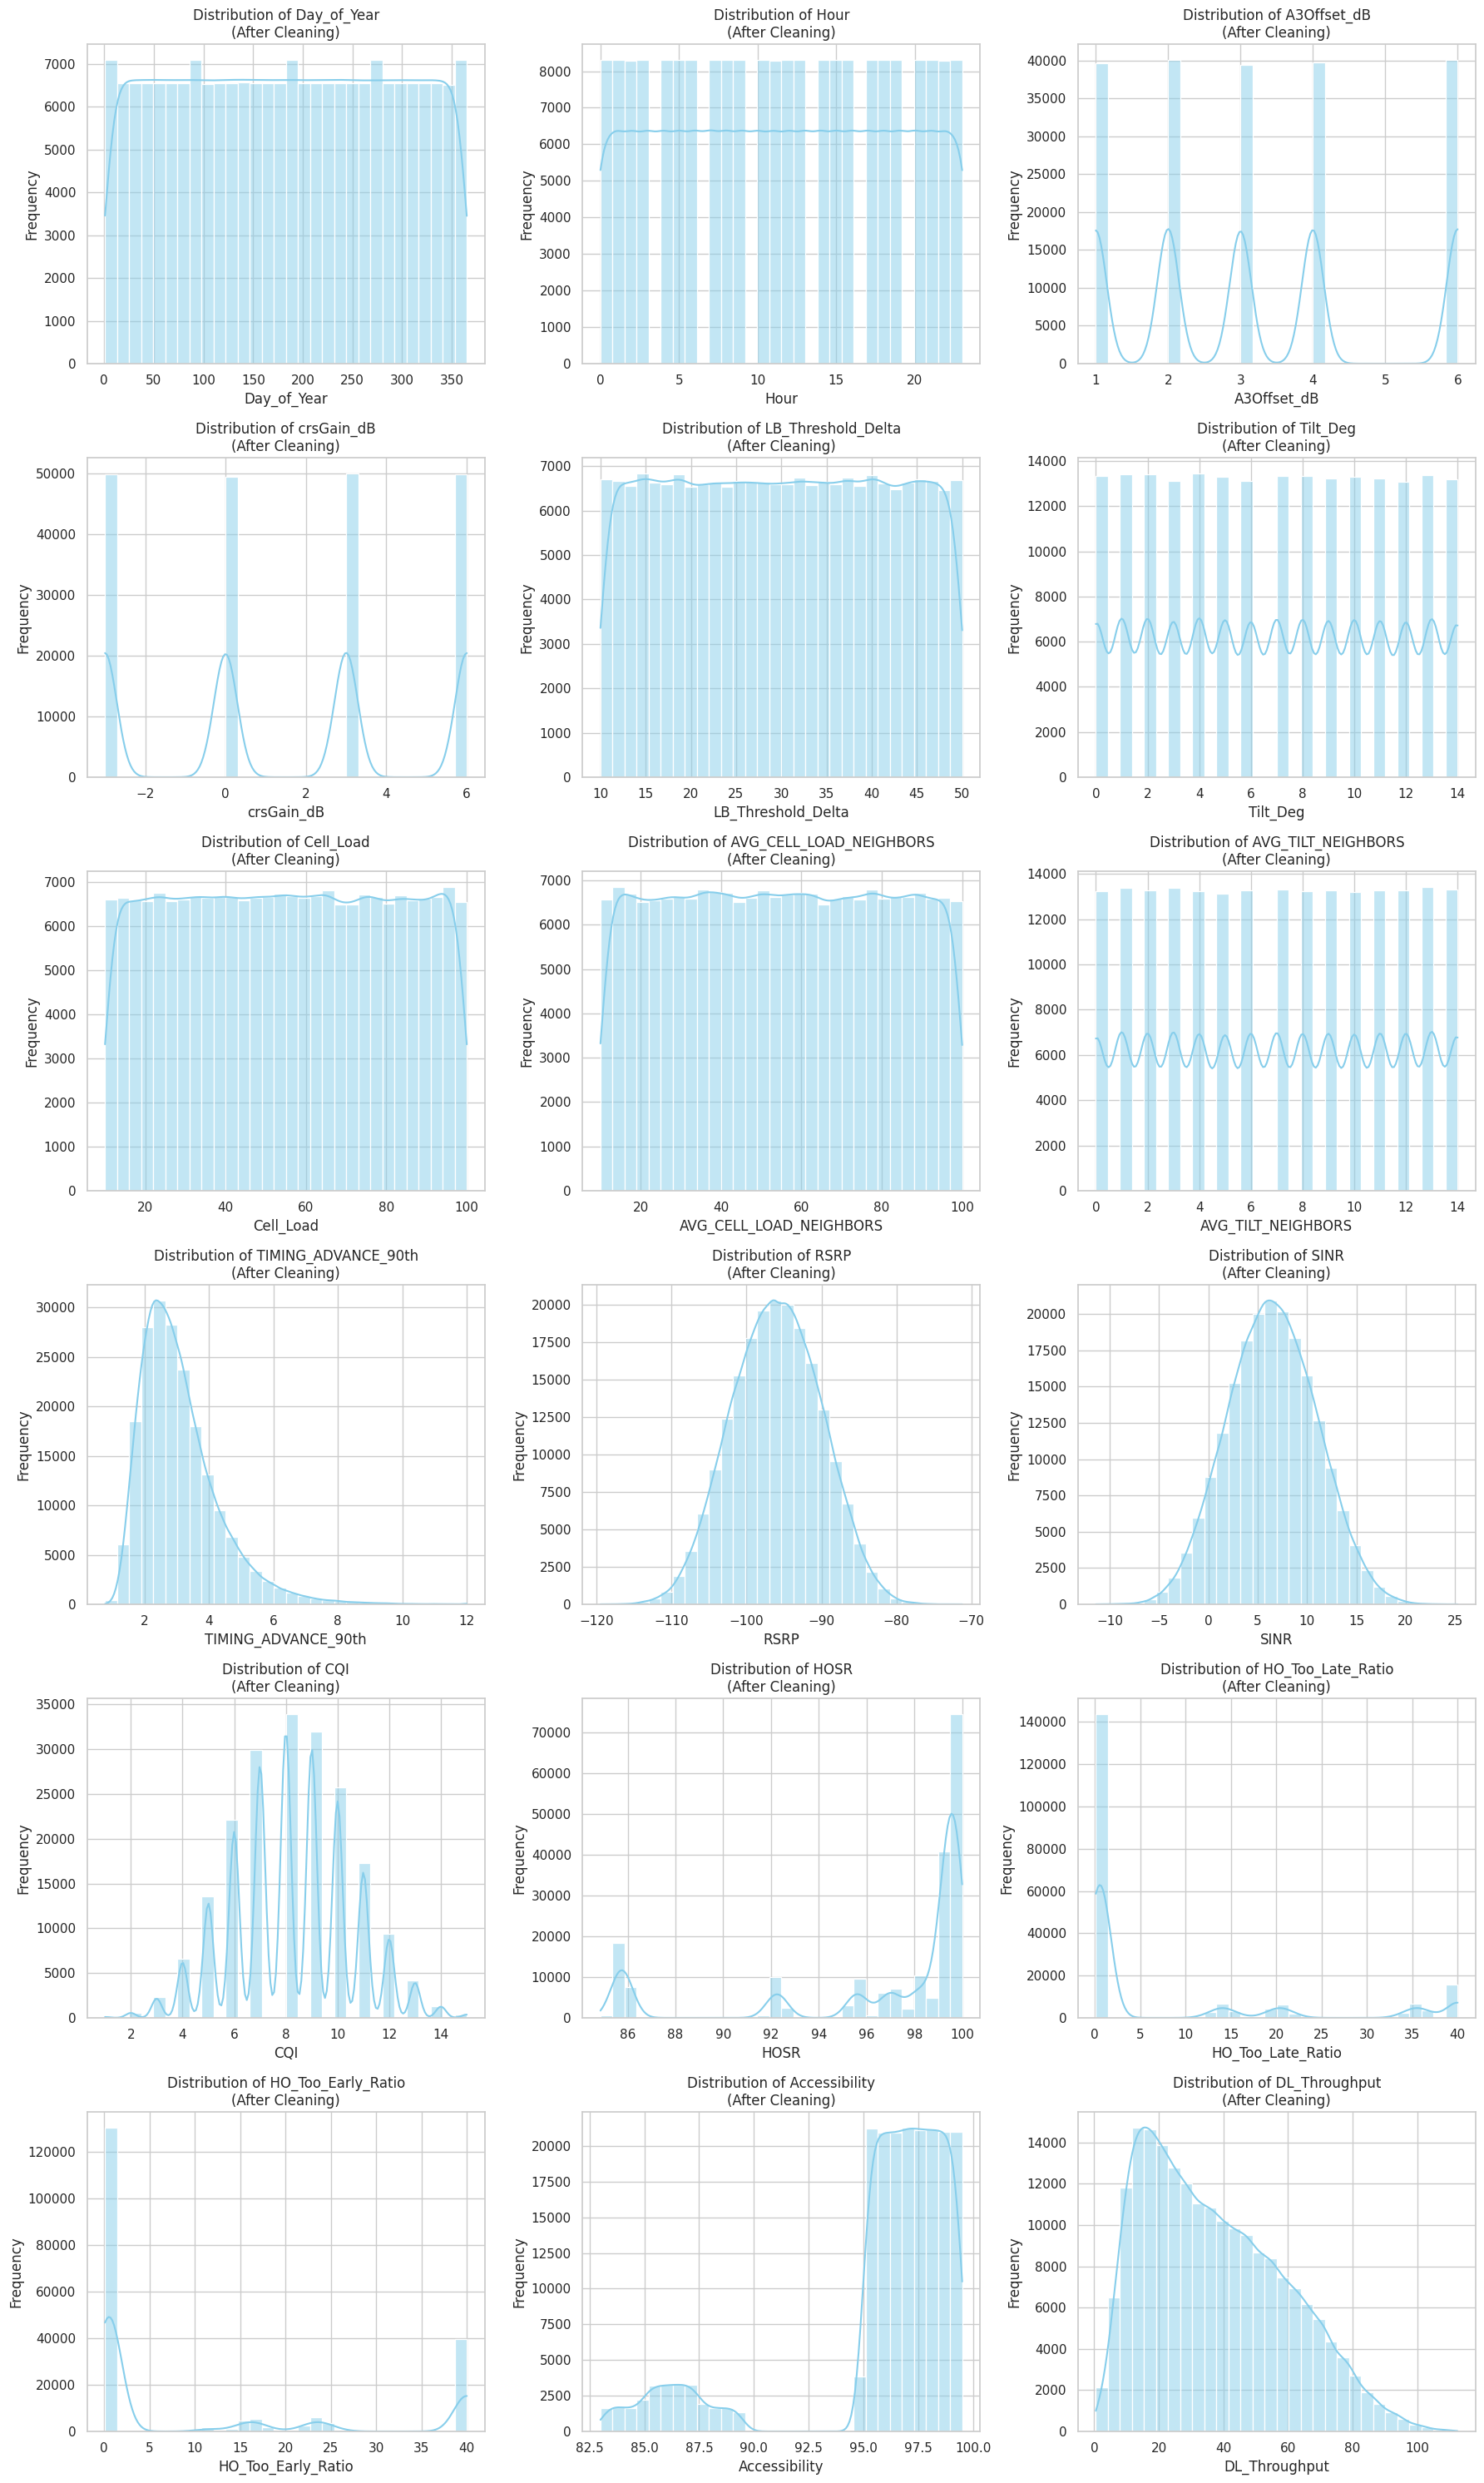

In [10]:
sns.set_theme(style="whitegrid", palette="muted")

# 1. Identify numerical columns
numeric_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype in ["int64", "float64"]]

# 2. Calculate grid dimensions (3 columns per row)
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# 3. Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten to iterate with a single index

# 4. Loop through KPIs and plot into the axes
for i, kpi in enumerate(numeric_cols):
    sns.histplot(df_cleaned[kpi], bins=30, kde=True, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {kpi}\n(After Cleaning)", fontsize=12)
    axes[i].set_xlabel(kpi)
    axes[i].set_ylabel("Frequency")

# 5. Hide any unused subplots (if the number of KPIs isn't a multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

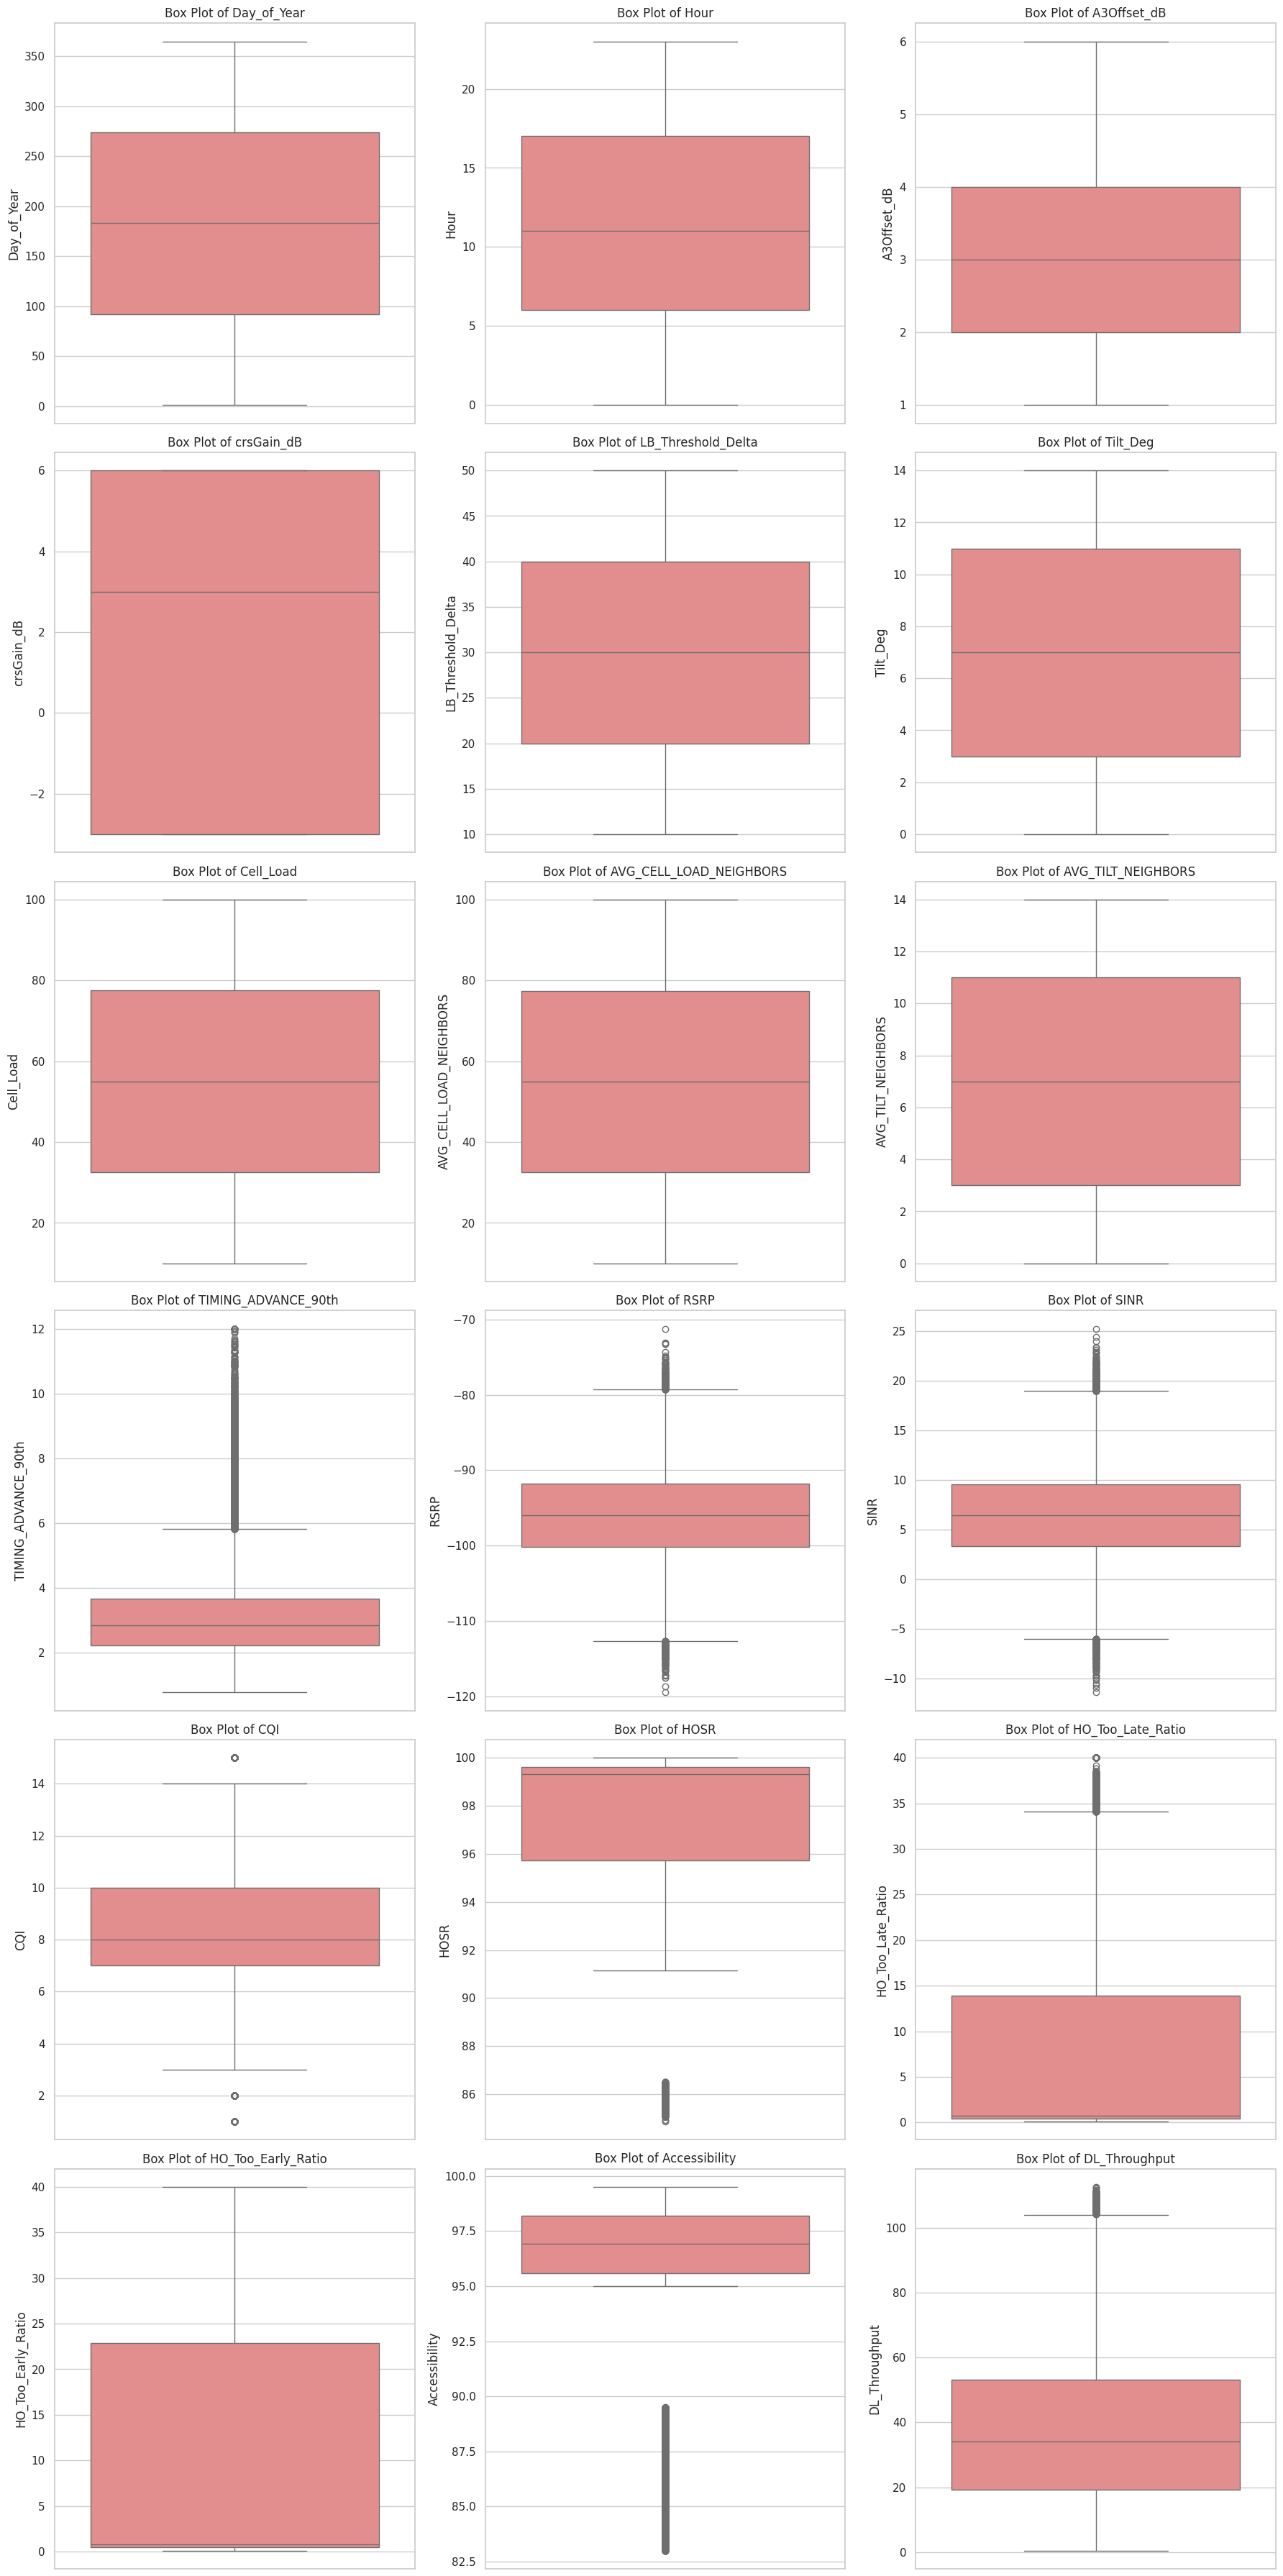

In [11]:
# Box Plot

# 3. Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

# 4. Loop through KPIs and plot into the axes
for i, kpi in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[kpi], color="lightcoral", ax=axes[i])
    axes[i].set_title(f"Box Plot of {kpi}", fontsize=12)
    axes[i].set_ylabel(kpi)

# 5. Hide any unused subplots (white space)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 7.2 Distributional Shift: Boxplots & Violin Plots

The distribution of features per target class must be analyzed

- Technique: Create boxplots where the X-axis is Optimization_Action and the Y-axis is a KPI (e.g., Cell_Load)
- Goal: Identify "Discriminatory Power."
    - If the median Cell_Load for ADD_NEW_SITE is significantly higher than for NO_ACTION, the feature is a strong predictor.
    - If the boxplots overlap almost entirely, the feature is "noisy" for that specific classification task.

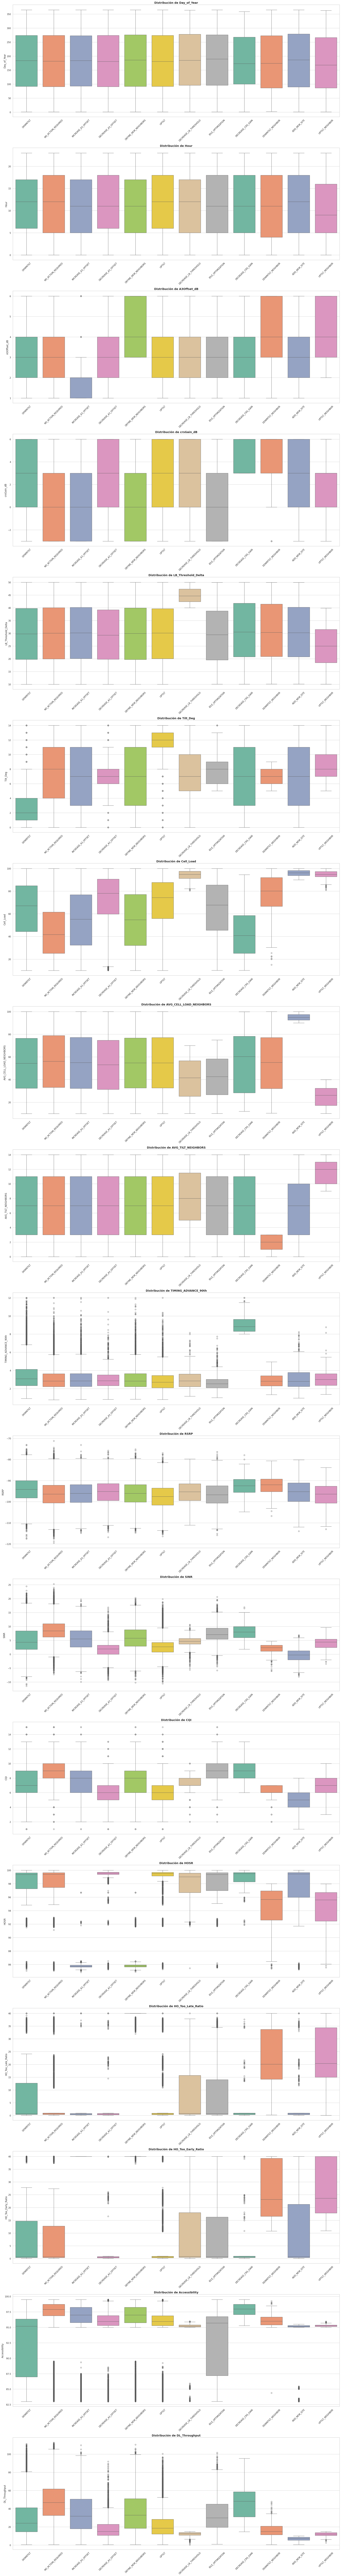

In [12]:
target_col = 'Primary_Action'

num_features = len(numeric_cols)
n_cols = 1
n_rows = math.ceil(num_features / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 10 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
        sns.boxplot(
            ax=axes[i], 
            data=df_cleaned, 
            x=target_col, 
            y=col, 
            hue=target_col, 
            palette='Set2', 
            legend=False
        )
        axes[i].set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel('') 
        
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

## 7.3 Target Class Balance

Classifer (e.g. XGBoost) are sensitive to class imbalance.

- Technique: A simple Bar Plot showing the count of each Optimization_Action.
- Goal: Quantify the minority class problem. If UPTILT has 5,000 samples but ADD_NEW_SITE only has 50, we will need to implement specific strategies (like scale_pos_weight in XGBoost or SMOTE) during the training phase.

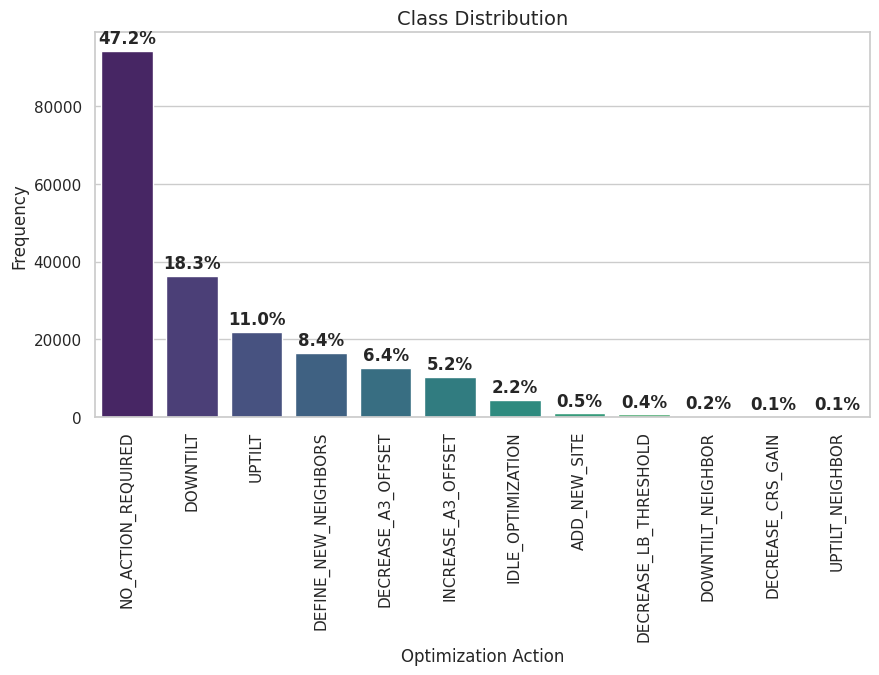

In [13]:
plt.figure(figsize=(10, 5))
counts = df_cleaned[target_col].value_counts()
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)
plt.title('Class Distribution', fontsize=14)
plt.ylabel('Frequency')
plt.xlabel('Optimization Action')
plt.xticks(rotation=90)

total = len(df_cleaned)
for i, v in enumerate(counts.values):
    plt.text(i, v + (total*0.01), f'{(v/total)*100:.1f}%', ha='center', fontweight='bold')

plt.show()

## 7.4 Multivariate Separation (Pairplots)

KPIs (RSRP, Load, CQI, etc.) colored by Optimization_Action using pairplots.

Visualize clusters. The clearer the separation the easier the model will learn that boundary.

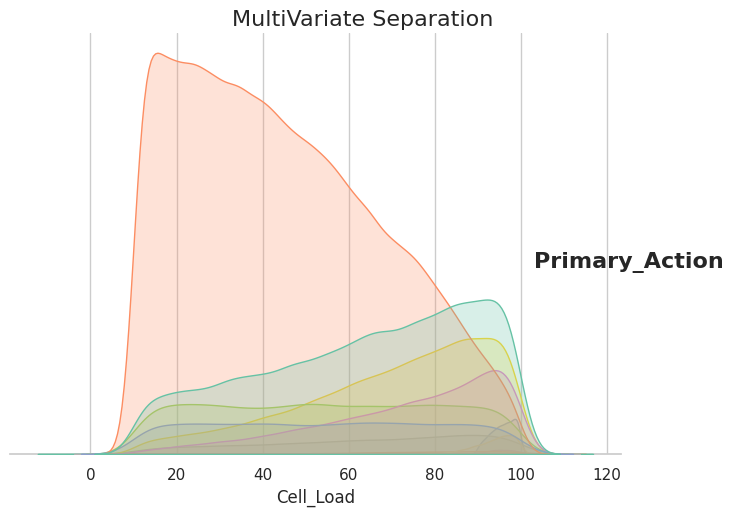

In [14]:
plot_features = ['Cell_Load']
pair_plot = sns.pairplot(
    df_cleaned[plot_features + [target_col]],
    hue=target_col,
    corner=True,
    palette='Set2',
    height=5,
    aspect=1.2)
pair_plot.fig.suptitle('MultiVariate Separation', y=1.02, fontsize=16)
pair_plot._legend.set_bbox_to_anchor((1.0, 0.5)) # Posición a la derecha
pair_plot._legend.set_title(target_col)
plt.setp(pair_plot._legend.get_texts(), fontsize='14') 
plt.setp(pair_plot._legend.get_title(), fontsize='16', fontweight='bold')

plt.subplots_adjust(right=0.85)
plt.show()

## 7.5 Feature importance via Mutual Information

Calculate the Mutual Information (MI) score between each feature and the categorical target.

Unlike linear correlation (used in regressors), MI captures any kind of statistical dependency. This tells KPIs are most informative for your classification labels before training is even started

Overall Mutual Information (MI) between the feature and the target variable across all classes is claculated. It is a single scalar value that quantifies how much information the feature provides about the class identity in a multi-class context

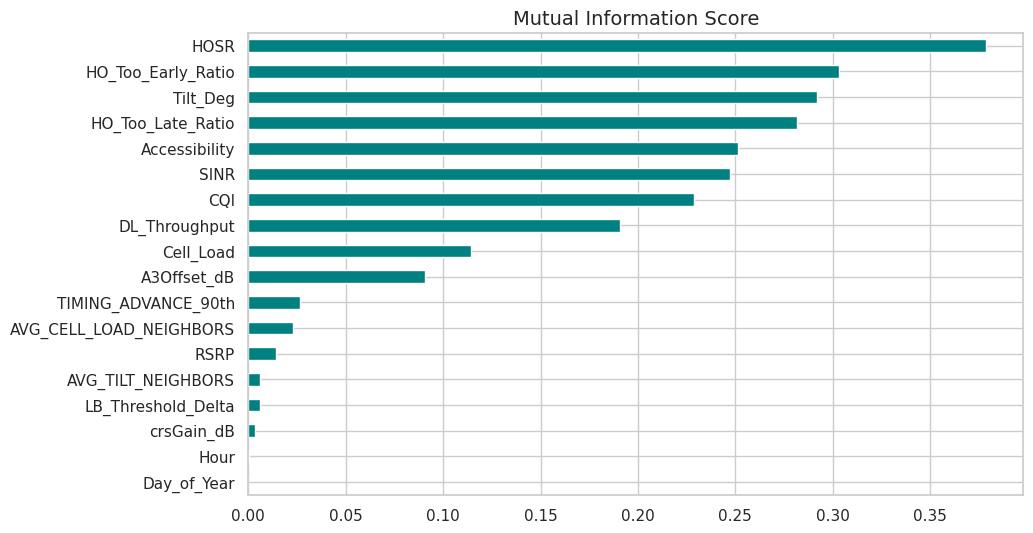

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(df_cleaned[target_col].astype(str))
X = df_cleaned[numeric_cols].fillna(0)

mi_scores = mutual_info_classif(X, y_encoded, discrete_features=False, random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mi_series.plot(kind='barh', color='teal')
plt.title('Mutual Information Score', fontsize=14)
plt.show()

## 7.6 Decision Boundary analysis (Heatmaps)

Instead of a standard Correlation Matrix, create a Mean-KPI-per-Action Heatmap.

Technique: Group the dataframe by Optimization_Action and calculate the mean for all features. Normalize the features and plot as a heatmap.

Goal: This creates a "Fingerprint" for each action. For example, the UPTILT row should show a "heat" signature on Low RSRP and Low Throughput.

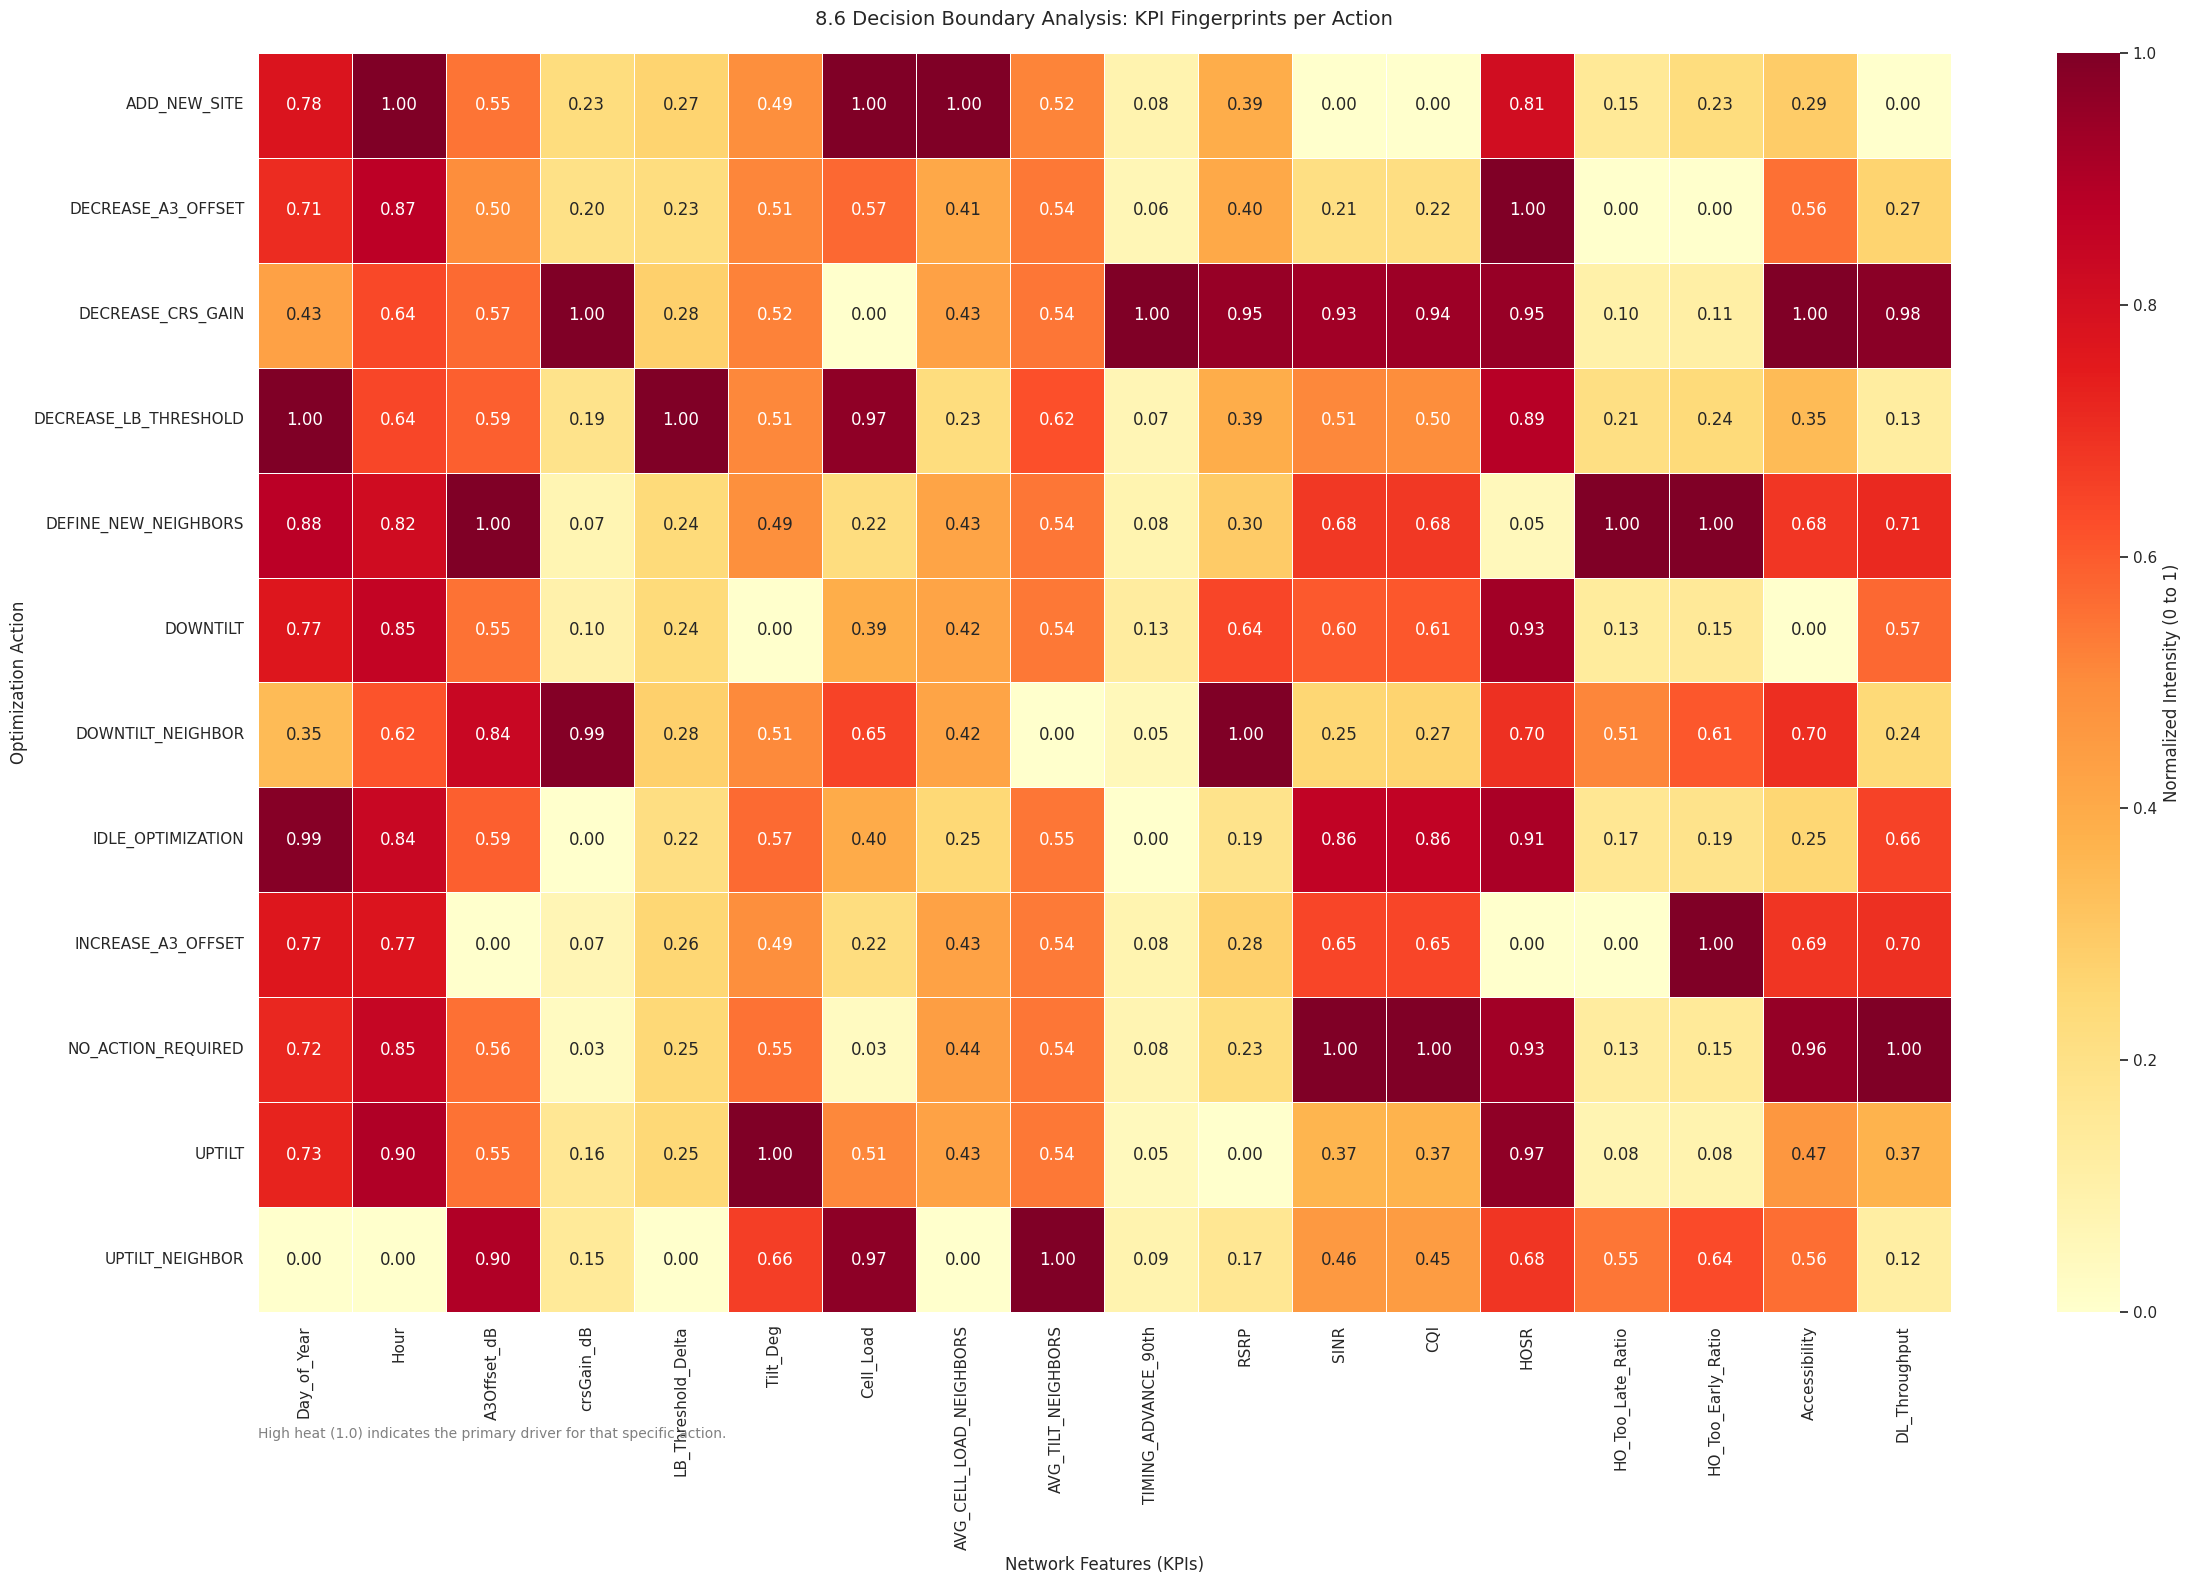

In [16]:
fingerprint_df = df_cleaned.groupby(target_col)[numeric_cols].mean()

# Normalization (in this case using Min-Max Scaling)
# Essential because RSRP (~-100), Load (0-1), and Throughput (0-100) 
# occupy different orders of magnitude.
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(fingerprint_df)

# Reconstruct DataFrame with normalized values
normalized_df = pd.DataFrame(
    normalized_data, 
    index=fingerprint_df.index, 
    columns=fingerprint_df.columns
)

# 3. Visualization
plt.figure(figsize=(24, 16))
sns.heatmap(
    normalized_df, 
    annot=True, 
    cmap='YlOrRd', 
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Normalized Intensity (0 to 1)'}
)

plt.title('8.6 Decision Boundary Analysis: KPI Fingerprints per Action', fontsize=14, pad=20)
plt.xlabel('Network Features (KPIs)', fontsize=12)
plt.ylabel('Optimization Action', fontsize=12)

# Interpretation Note
plt.annotate(
    'High heat (1.0) indicates the primary driver for that specific action.',
    xy=(0, -0.1), 
    xycoords='axes fraction', 
    fontsize=10, 
    color='gray'
)

plt.tight_layout()
plt.show()


## 8 Data Preparation for Modeling

This section describes the critical preprocessing steps required before training the classification models. These transformations ensure that the data is in the optimal format for machine learning algorithms and that the models can learn effectively from the network KPI patterns.

### **Feature Selection**
Feature selection is the process of identifying and retaining only the most relevant predictors for the classification task. In this network optimization context, we carefully select KPIs that have show any correlation with the required optimization actions.

### **Input Scaling Strategy**

Input scaling (normalization/standardization) is crucial for classifier performance, particularly for distance-based algorithms and neural networks. Without proper scaling, features with larger numerical ranges can dominate the learning process, leading to suboptimal results.

- Distance-Based Algorithms (SVM, k-NN): These algorithms calculate distances between data points. Features with larger scales (e.g., Cell_Load ranging 0-100) will dominate over smaller-scale features (e.g., CQI ranging 1-15), distorting the distance calculations and leading to biased predictions.

- Gradient-Based Optimization (Neural Networks, Logistic Regression): Features on different scales cause the loss function to have elongated contours, making gradient descent converge slowly or get stuck in local minima. Scaled features create more spherical contours, enabling faster and more stable convergence.

- Common Scaling Techniques:

    - StandardScaler: Transforms features to have mean=0 and standard deviation=1. Ideal when features follow a Gaussian distribution.

    - MinMaxScaler: Scales features to a fixed range (typically [0,1]). Useful when you need bounded values and the distribution is not Gaussian.

    - RobustScaler: Uses median and interquartile range, making it resistant to outliers—particularly important for network KPIs that may contain anomalous measurements.

In this project, we apply scaling to ensure that all KPIs contribute proportionally to the model's decision-making process, regardless of their original measurement units or ranges.

### **Label Encoder Concept**

The Label Encoder is essential for converting categorical target variables (optimization actions) into numerical format that machine learning algorithms can process.

The Label Encoder assigns a unique integer to each distinct class in the target variable. For example:

- "NO_ACTION_REQUIRED" → 0
- "UPTILT" → 1
- "DOWNTILT" → 2
- "DECREASE_A3_OFFSET" → 3
- etc.

Importance of Label Encoding:
- Algorithm Compatibility: Most classification algorithms require numerical inputs. Label encoding bridges the gap between human-readable action names and machine-processable integers.
- Consistency: The encoder maintains a consistent mapping between labels and integers throughout training and inference, preventing misclassification due to inconsistent encoding.
- Inverse Transformation: The encoder can convert predictions back to original labels, making results interpretable for network engineers.
- Memory Efficiency: Integer representations are more memory-efficient than string labels, especially important when dealing with large datasets.

Notes:
- The encoder must be fitted on the training data and saved for use during inference
- The same encoder instance must be used for both training and prediction to maintain label consistency

For multi-class classification (as in this project), the encoded labels serve as indices for the output layer neurons

### **Addressing Class Imbalance**

The compute_sample_weight function is crucial for handling class imbalance—a common challenge in network optimization where certain actions (like "NO_ACTION_REQUIRED") occur much more frequently than critical interventions (like "ADD_NEW_SITE").

Without addressing imbalance, classifiers become biased toward the majority class, achieving high overall accuracy while failing to detect minority classes—precisely the critical optimization actions that network engineers need to identify.

How compute_sample_weight works:

- The function calculates weights inversely proportional to class frequencies:
- Frequent classes (e.g., "NO_ACTION_REQUIRED") receive lower weights
- Rare classes (e.g., "ADD_NEW_SITE") receive higher weights

This weighting scheme forces the model to pay equal attention to all classes during training, regardless of their frequency in the dataset.

In [22]:
## Feature Selection - for this case all features are used, except the ones related to the temporal detection

features = ['A3Offset_dB',
    'crsGain_dB',
    'LB_Threshold_Delta',
    'Tilt_Deg',
    'Cell_Load',
    'RSRP',
    'SINR',
    'CQI',
    'HOSR',
    'HO_Too_Late_Ratio',
    'HO_Too_Early_Ratio',
    'Accessibility',
    'DL_Throughput',
    'AVG_CELL_LOAD_NEIGHBORS',
    'AVG_TILT_NEIGHBORS',
    'TIMING_ADVANCE_90th'
    ]


## Data preparation
X = df_cleaned[features]
y = df_cleaned['Primary_Action']

## Inputs scailing using Standard Scarler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Label Encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Train - Test Split for both scaled data and not scaled
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train_scaled, X_test_scaled, y_train_sc, y_test_sc = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Compute sample weight for class balancing
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

results = {}

# 9 Models Development & Evaluation

## 9.1 PCA for class visualization

Principal Component Analysis (PCA) serves as a crucial preprocessing and exploratory tool in the development of AI classifiers, particularly for complex multi-dimensional datasets such as the network optimization actions classifier presented in this project. Before training sophisticated machine learning models to classify network optimization actions (such as UPTILT, DOWNTILT, DECREASE_A3_OFFSET, etc.), it is essential to understand the underlying structure and separability of the data.

**Dimensionality Reduction for Visualization**

The network optimization dataset contains 14 numerical features representing various Key Performance Indicators (KPIs) and configuration parameters (Cell_Load, RSRP, SINR, CQI, HOSR, A3Offset_dB, crsGain_dB, etc.). Visualizing class separability in 14-dimensional space is impossible for human interpretation. PCA reduces this high-dimensional space to 2 or 3 principal components while preserving the maximum amount of variance, enabling effective visualization of how different optimization actions cluster in the feature space.

**Early Detection of Classification Challenges**

By projecting the data onto the first few principal components and color-coding by target classes (optimization actions), we can immediately identify:

- Well-separated classes: Actions like NO_ACTION_REQUIRED vs. ADD_NEW_SITE should show clear separation if the features effectively distinguish between these scenarios
- Overlapping classes: Similar actions (e.g., UPTILT vs. UPTILT_NEIGHBOR) may show significant overlap, indicating potential classification difficulties
- Outliers and anomalies: Data points that don't cluster with their assigned class may indicate labeling errors or exceptional cases

**Model Selection Guidance**

The PCA visualization provides guidance for classifier selection:

- Linear separability: If classes are linearly separable in PCA space, simpler models (SVM with linear kernel, logistic regression) may suffice
- Complex boundaries: Overlapping or non-linearly separated classes suggest the need for more sophisticated models (Random Forest, Neural Networks, SVM with RBF kernel)
- Imbalanced classes: Visualization reveals class distribution imbalances that require specific handling strategies

For this specific project, PCA visualization is particularly valuable because:

- Multi-class Problem: With actions like NO_ACTION_REQUIRED, UPTILT, DOWNTILT, DECREASE_A3_OFFSET, INCREASE_A3_OFFSET, DEFINE_NEW_NEIGHBORS, etc., understanding the separability between all pairs of classes is crucial.

- Domain-Specific Feature Relationships: Network KPIs have complex interdependencies (e.g., RSRP vs. SINR, Cell_Load vs. DL_Throughput) that PCA can reveal and visualize.

- Operational Impact: Misclassification in network optimization has real-world consequences. Understanding potential confusion between similar actions (e.g., UPTILT vs. DOWNTILT) helps prioritize model improvements.


[1] Dimensionality Reduction: Visualizing Class Separability


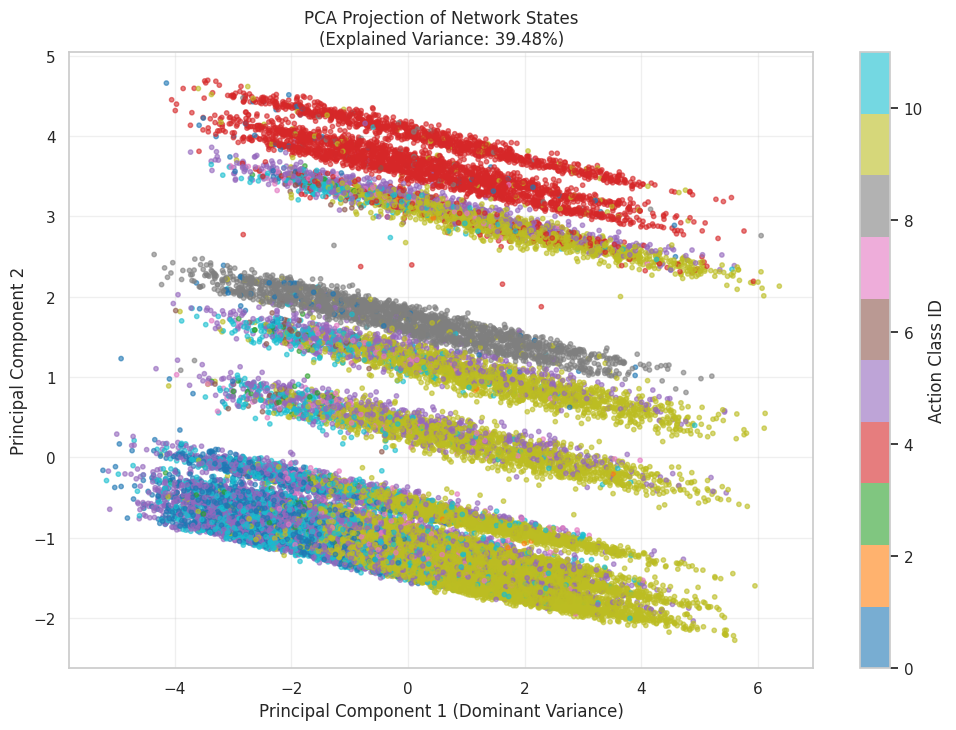

In [24]:
print("\n[1] Dimensionality Reduction: Visualizing Class Separability")

# 1.1 PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Action Class ID')
plt.title(f'PCA Projection of Network States\n(Explained Variance: {np.sum(pca.explained_variance_ratio_):.2%})')
plt.xlabel('Principal Component 1 (Dominant Variance)')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

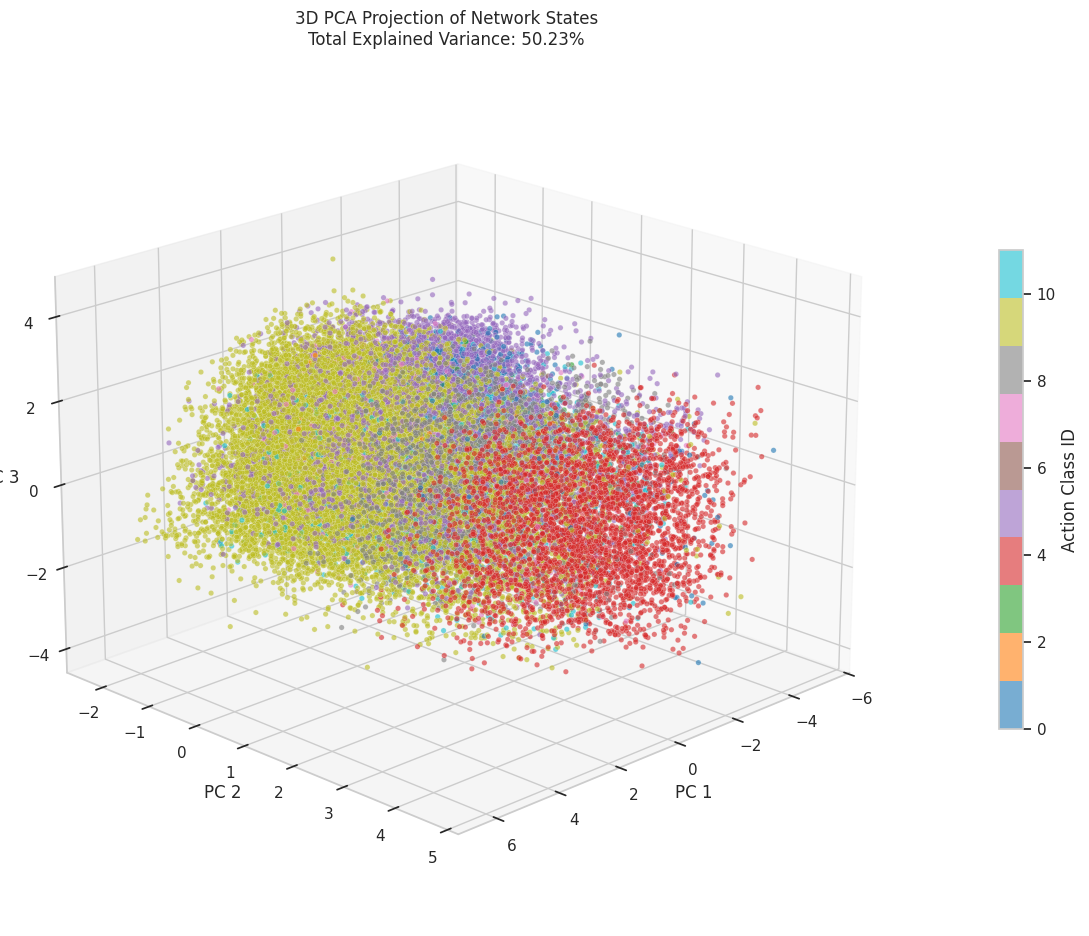

Component 1 explains 21.98% of the total variance.
Component 2 explains 17.49% of the total variance.
Component 3 explains 10.75% of the total variance.


In [26]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test_scaled)

# Calculate explained variance
total_var = np.sum(pca.explained_variance_ratio_)

# Create 3D Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# c=y_test maps the colors to your classes
# cmap='tab10' provides a distinct color palette for up to 10 classes
scatter = ax.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    X_pca[:, 2], 
    c=y_test, 
    cmap='tab10', 
    alpha=0.6, 
    s=15,
    edgecolors='w',
    linewidth=0.2
)

# Labeling
ax.set_title(f'3D PCA Projection of Network States\nTotal Explained Variance: {total_var:.2%}')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Add Colorbar for class identification
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.5)
colorbar.set_label('Action Class ID')

# Improve view angle for better depth perception
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# Print variance breakdown per component
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1} explains {ratio:.2%} of the total variance.")

In [19]:
# If classes are mixed in PCA, it means linear separation is impossible.
# This justifies using Non-Linear models like XGBoost or Neural Networks.

## 9.2 XGBC Classifier

XGBoost (eXtreme Gradient Boosting) is an advanced ensemble learning algorithm that uses gradient boosting to combine multiple weak learners (typically decision trees) into a strong classifier. It builds models sequentially, where each new model corrects errors made by previous models. This technique was already presented in previous lab1 as a regressor

Why XGBoost is ideal for this specific dataset:

- Multi-class Classification: Handles your 10+ optimization actions naturally
- Feature Relationships: Captures complex interactions between KPIs (e.g., RSRP vs SINR vs Cell_Load)
- Domain Alignment: Network optimization involves rule-based decisions that tree ensembles model well
- Operational Requirements: Fast inference needed for real-time network management

--- Training XGBoost ---
                       precision    recall  f1-score   support

         ADD_NEW_SITE       0.91      1.00      0.96       202
   DECREASE_A3_OFFSET       0.88      0.94      0.91      2554
    DECREASE_CRS_GAIN       0.67      0.97      0.79        37
DECREASE_LB_THRESHOLD       0.40      0.89      0.55       150
 DEFINE_NEW_NEIGHBORS       0.93      0.91      0.92      3329
             DOWNTILT       0.79      0.90      0.84      7278
    DOWNTILT_NEIGHBOR       0.59      0.98      0.74        89
    IDLE_OPTIMIZATION       0.22      0.94      0.35       886
   INCREASE_A3_OFFSET       0.95      0.98      0.97      2083
   NO_ACTION_REQUIRED       0.93      0.66      0.77     18819
               UPTILT       0.70      0.87      0.78      4380
      UPTILT_NEIGHBOR       0.37      0.97      0.53        32

             accuracy                           0.79     39839
            macro avg       0.70      0.92      0.76     39839
         weighted avg       

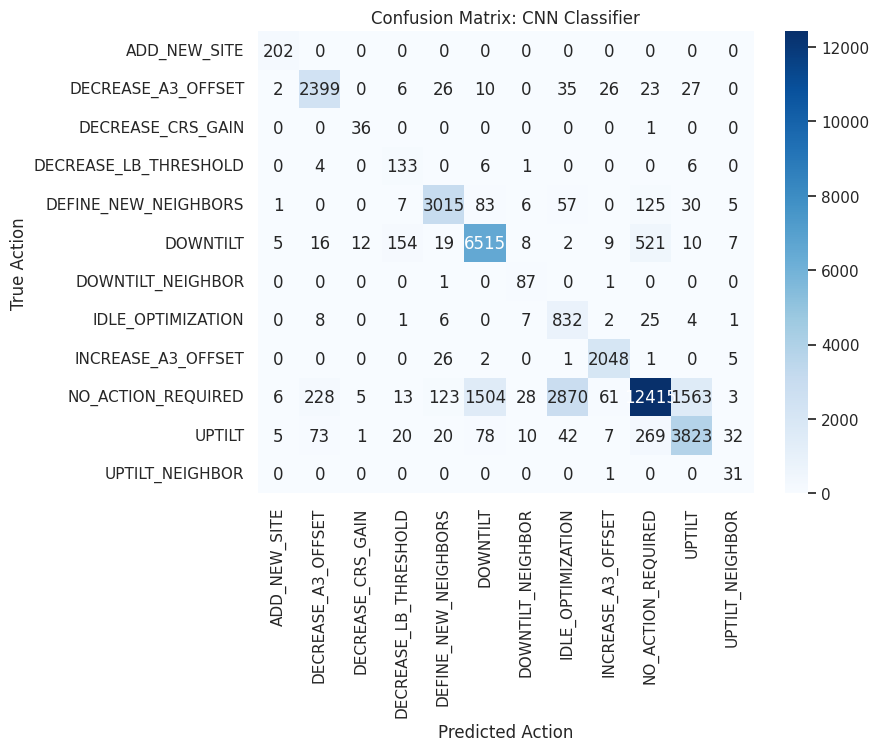

In [ ]:
# --- XGBOOST CLASSIFIER (Baseline) ---
print("--- Training XGBoost ---")
xgb = XGBClassifier(
    n_estimators=20,
    learning_rate=0.05,
    max_depth=12,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_xgb = xgb.predict(X_test)
results['XGBoost'] = f1_score(y_test, y_pred_xgb, average='macro')

print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Confusion Matrix for visual check of class confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: CNN Classifier')
plt.ylabel('True Action')
plt.xlabel('Predicted Action')
plt.show()

## 9.3 Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees using bootstrap aggregating (bagging). Each tree is trained on a random subset of data and features, and the final prediction is made by majority voting across all trees.

Why Random Forest works well for this dataset:

- Multi-class Handling: Naturally handles your 10+ optimization actions
- Feature Interpretability: Critical for network engineering validation
- Robustness: Handles measurement noise and outliers in KPI data
- Domain Alignment: Network decisions often follow tree-like logic



Entrenando Random Forest ---
                       precision    recall  f1-score   support

         ADD_NEW_SITE       0.97      0.97      0.97       202
   DECREASE_A3_OFFSET       0.79      0.95      0.86      2554
    DECREASE_CRS_GAIN       0.80      0.89      0.85        37
DECREASE_LB_THRESHOLD       0.62      0.87      0.73       150
 DEFINE_NEW_NEIGHBORS       0.91      0.91      0.91      3329
             DOWNTILT       0.85      0.89      0.87      7278
    DOWNTILT_NEIGHBOR       0.62      0.97      0.75        89
    IDLE_OPTIMIZATION       0.29      0.90      0.43       886
   INCREASE_A3_OFFSET       0.95      0.99      0.97      2083
   NO_ACTION_REQUIRED       0.92      0.75      0.83     18819
               UPTILT       0.71      0.81      0.76      4380
      UPTILT_NEIGHBOR       0.47      0.94      0.62        32

             accuracy                           0.83     39839
            macro avg       0.74      0.90      0.80     39839
         weighted avg  

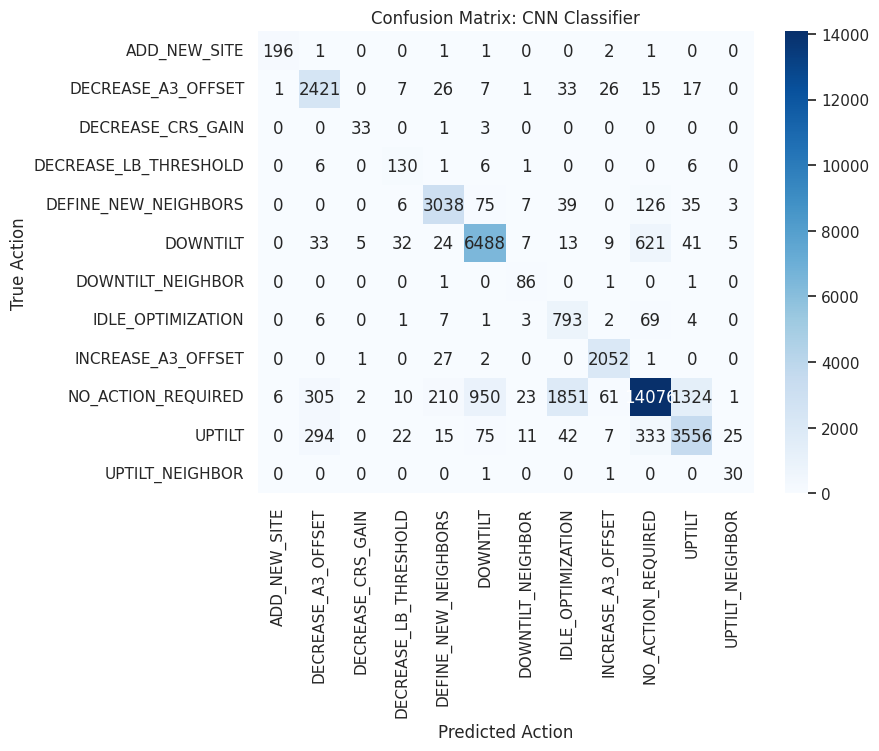

In [27]:
# --- RANDOM FOREST (Robustness Check) ---
print("\nEntrenando Random Forest ---")
rf = RandomForestClassifier(
    n_estimators=20,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['RandomForest'] = f1_score(y_test, y_pred_rf, average='macro')

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix for visual check of class confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: CNN Classifier')
plt.ylabel('True Action')
plt.xlabel('Predicted Action')
plt.show()

## 9.4 CNN approach

Convolutional Neural Networks (CNNs) are traditionally designed for image recognition but can be adapted for tabular data by converting structured data into image-like representations. This approach transforms your network KPI data into 2D matrices that CNNs can process using spatial pattern recognition.

Pros of CNN Approach for Network Data:

- Spatial Pattern Recognition: Can detect complex spatial relationships between KPIs and Identifies local patterns in feature neighborhoods
- Translation Invariance: Robust to feature ordering changes and handles missing features gracefully
- Hierarchical Feature Learning: Lower layers detect simple KPI combinations while higher layers identify complex optimization patterns
- Automatic feature engineering through convolution
- Transfer Learning Potential: Pre-trained CNN architectures can be adapted


[2] Deep Learning: Tabular-to-Image CNN Classifier


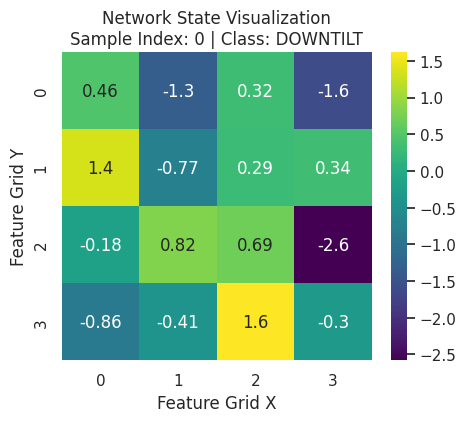


--- Training 2D CNN on 'Network Images' ---


/home/erodrja/envs/ago_py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-29 22:25:18.095863: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

DETAILED CLASSIFICATION REPORT: 2D CNN
                       precision    recall  f1-score   support

         ADD_NEW_SITE       0.54      0.73      0.62       202
   DECREASE_A3_OFFSET       0.88      0.81      0.84      2554
    DECREASE_CRS_GAIN       0.67      0.27      0.38        37
DECREASE_LB_THRESHOLD       0.61      0.37      0.46       150
 DEFINE_NEW_NEIGHBORS       0.94      0.90      0.92      3329
             DOWNTILT       0.89      0.84      0.87      7278
    DOWNTILT_NEIGHBOR       0.74      0.70      0.72        89
    IDLE_OPTIMIZATION       0.80      0.27      0.40       886
   INCREASE_A3_OFFSET       0.94      0.98      0.96      2083
   NO_ACTION_REQUIRED       0.86      0.94      0.90     18819
               UPTILT       0.85      0.77      0.80      4380
      UPTILT_NEIGHBOR       0.43      0.09      0.15        32

             accuracy                           0.87     39839
            macro avg       0.76 

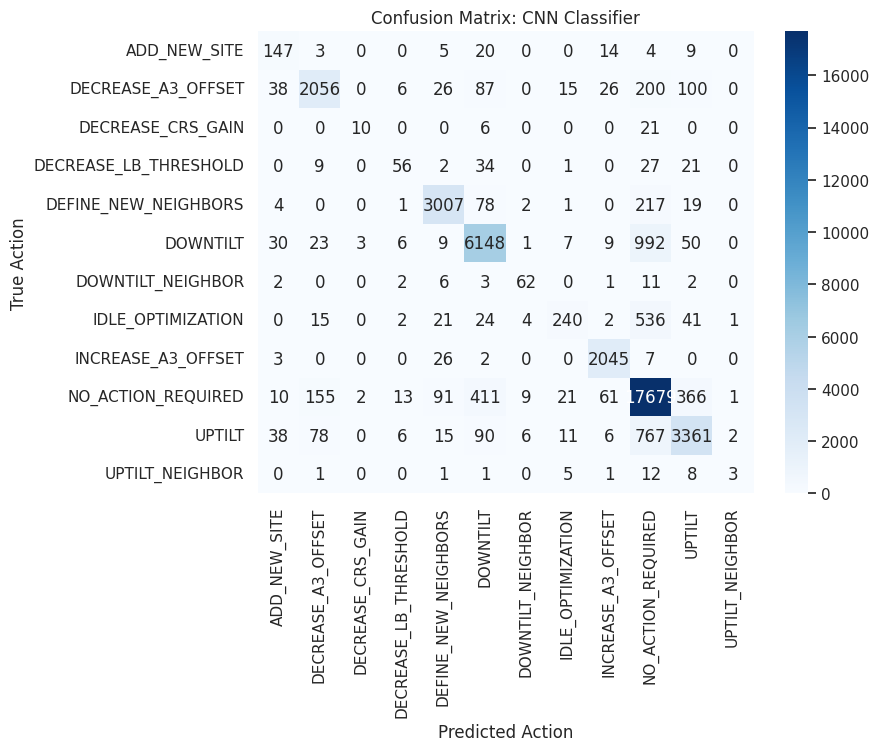

In [28]:
# ==============================================================================
#  THE "CNN" APPROACH (Treating Data as Images)
# ==============================================================================
print("\n[2] Deep Learning: Tabular-to-Image CNN Classifier")

# Concept: We have N features (e.g., 12). We can treat them as a 1D signal or reshape to 2D.
# Let's use Conv1D (Convolution over the feature vector).

def get_image_dimensions(n):
    """Finds the smallest square dimensions to fit n features."""
    side = int(np.ceil(np.sqrt(n)))
    return side, side

def reshape_to_image(data, side):
    """Pads data with zeros if needed and reshapes to (side, side, 1)."""
    n_samples = data.shape[0]
    n_features = data.shape[1]
    padded_size = side * side
    
    # Create zero padding
    padding = np.zeros((n_samples, padded_size - n_features))
    padded_data = np.hstack((data, padding))
    
    # Reshape to 2D image format for CNN
    return padded_data.reshape((n_samples, side, side, 1))

# Setup dimensions
side, _ = get_image_dimensions(X_train_scaled.shape[1])
X_train_img = reshape_to_image(X_train_scaled, side)
X_test_img = reshape_to_image(X_test_scaled, side)

def plot_network_state_as_image(index, data_img, labels, class_names):
    """Visualizes a specific network state as a heatmap for students."""
    plt.figure(figsize=(5, 4))
    # Remove the channel dimension for plotting
    sns.heatmap(data_img[index, :, :, 0], annot=True, cmap='viridis', cbar=True)
    
    label_idx = labels[index]
    class_name = class_names[label_idx]
    
    plt.title(f"Network State Visualization\nSample Index: {index} | Class: {class_name}")
    plt.xlabel("Feature Grid X")
    plt.ylabel("Feature Grid Y")
    plt.show()

# Visualize the first sample of the test set
# (Explain to students: High/Low intensity pixels represent normalized KPI values)
plot_network_state_as_image(0, X_test_img, y_test, le.classes_)

# --- IMPROVEMENT 2: CNN 2D ARCHITECTURE & DETAILED EVALUATION ---

print("\n--- Training 2D CNN on 'Network Images' ---")

num_classes = len(le.classes_)

model_cnn_2d = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(side, side, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_cnn_2d.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Train (silent for brevity)
model_cnn_2d.fit(X_train_img, y_train, epochs=15, batch_size=32, verbose=0, validation_split=0.1)

# Generate Predictions
y_pred_prob = model_cnn_2d.predict(X_test_img)
y_pred_cnn = np.argmax(y_pred_prob, axis=1)

# Detailed Evaluation
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT: 2D CNN")
print("="*60)
print(classification_report(y_test, y_pred_cnn, target_names=le.classes_))

# Confusion Matrix for visual check of class confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix: CNN Classifier')
plt.ylabel('True Action')
plt.xlabel('Predicted Action')
plt.show()


[4] Explainability: Why did the model choose this action?


ADD_NEW_SITE


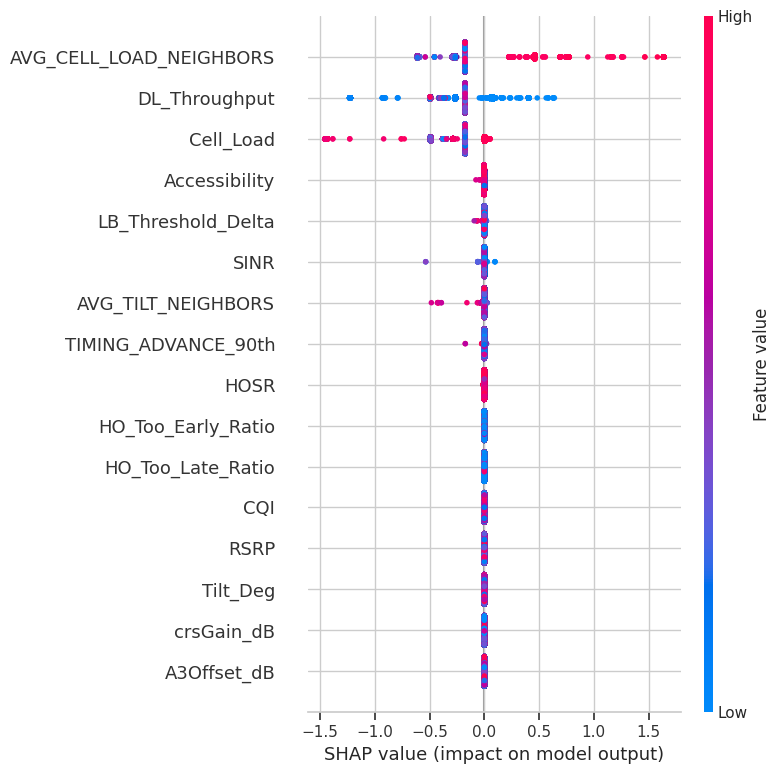

DECREASE_A3_OFFSET


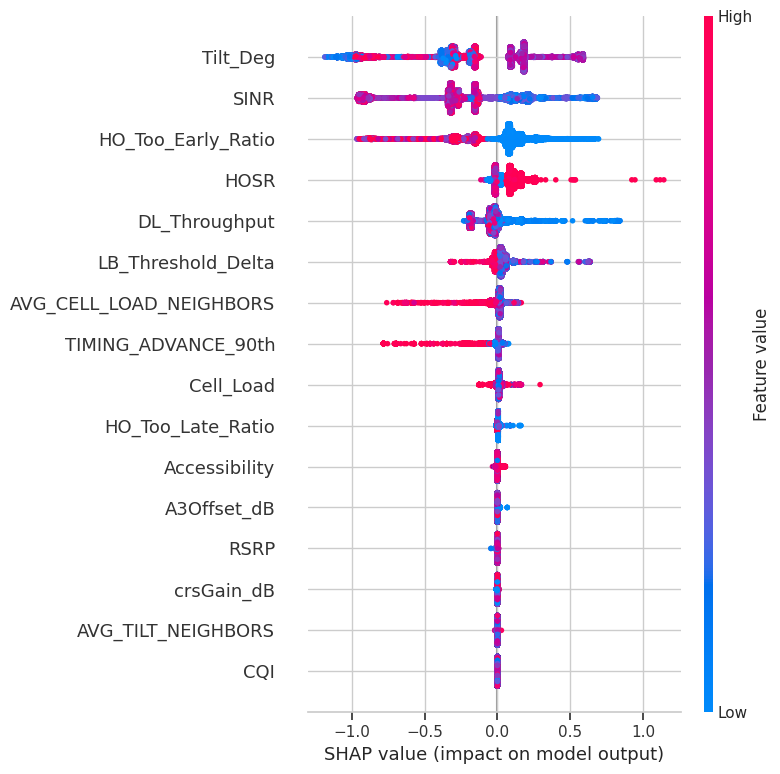

DECREASE_CRS_GAIN


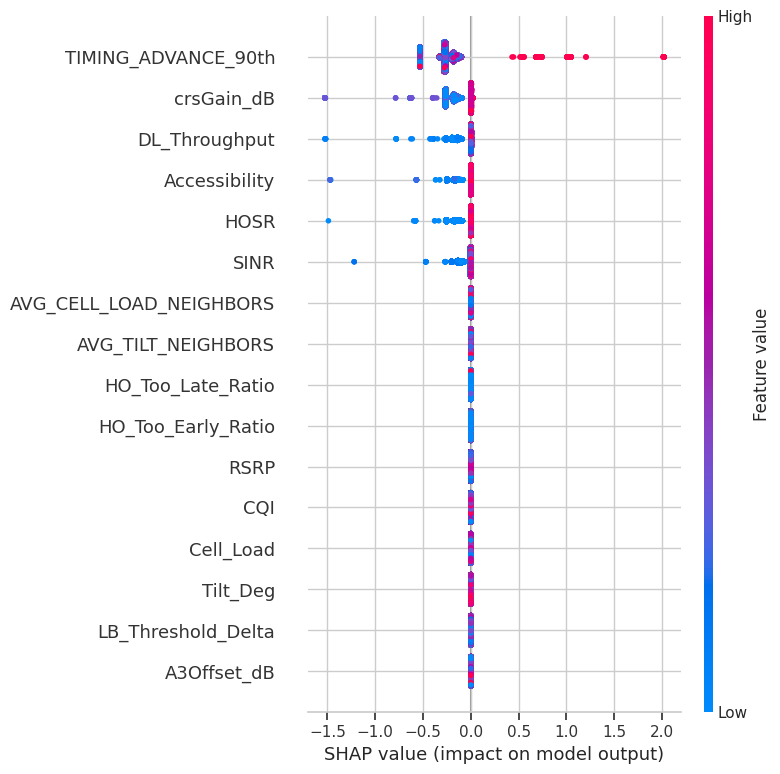

DECREASE_LB_THRESHOLD


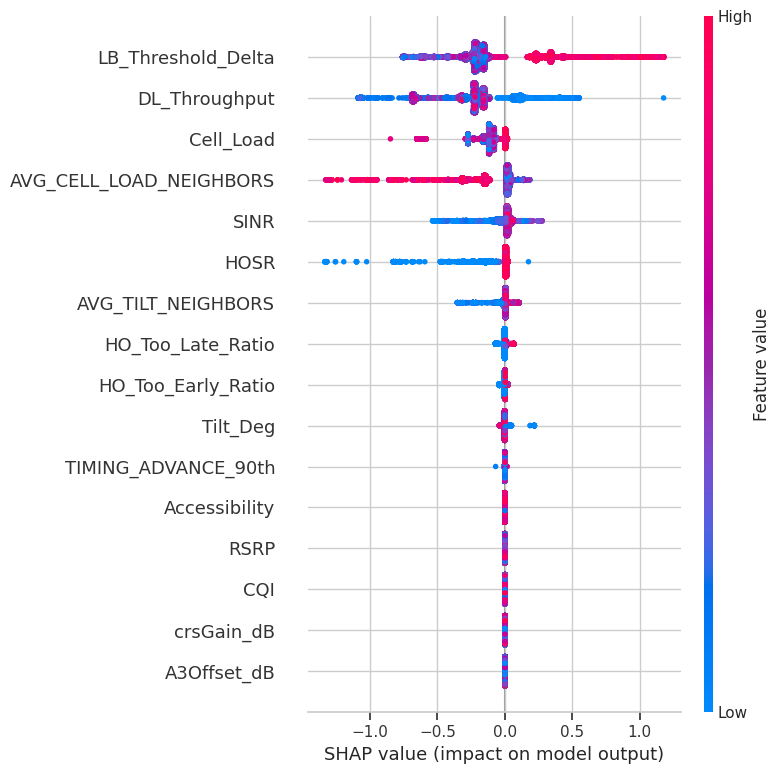

DEFINE_NEW_NEIGHBORS


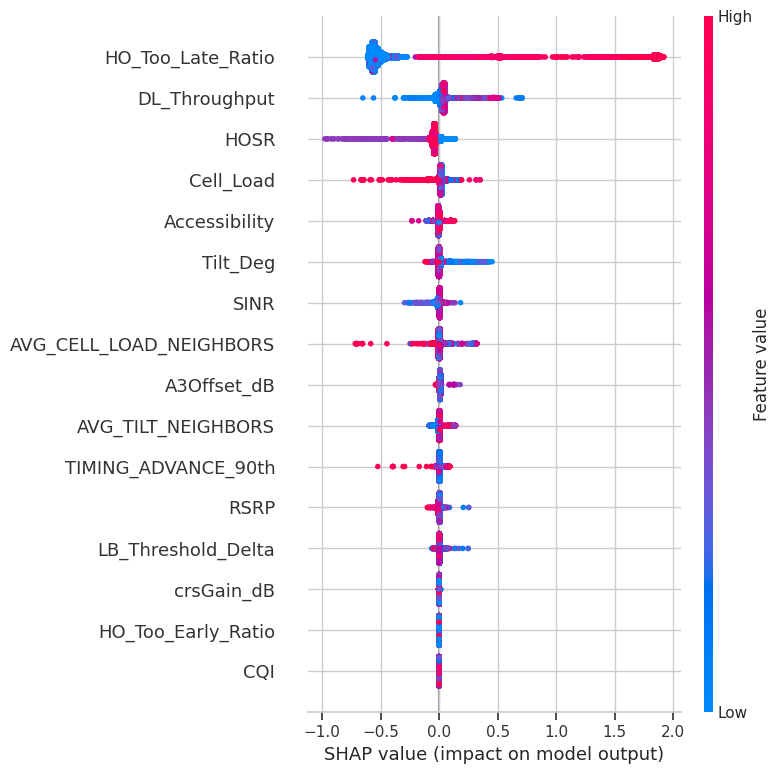

DOWNTILT


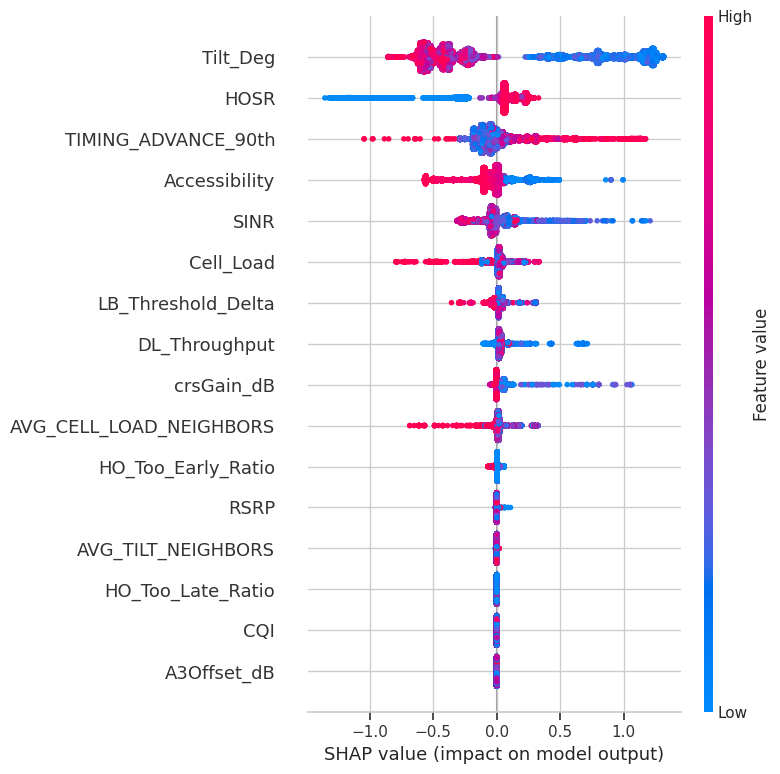

DOWNTILT_NEIGHBOR


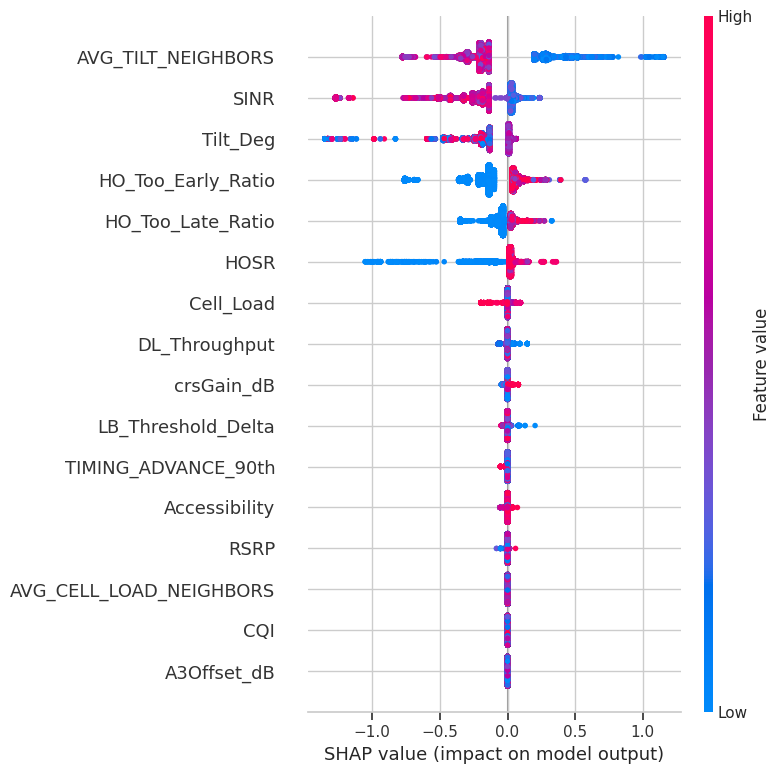

IDLE_OPTIMIZATION


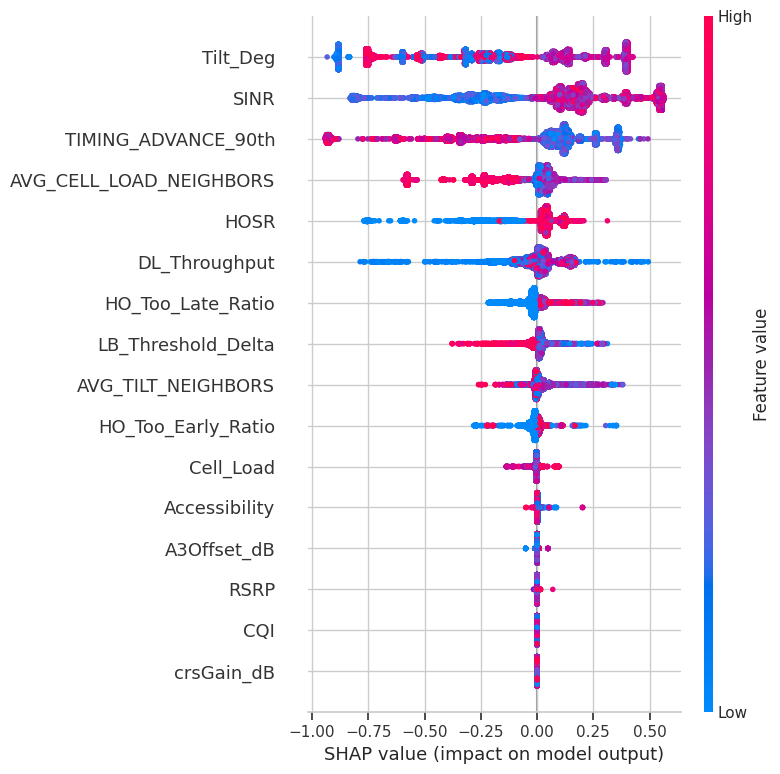

INCREASE_A3_OFFSET


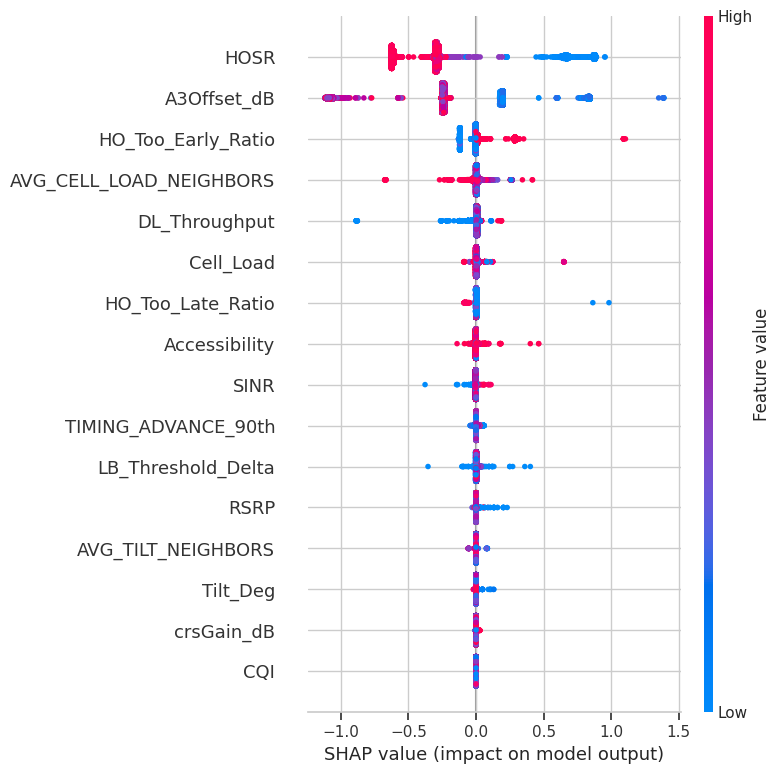

NO_ACTION_REQUIRED


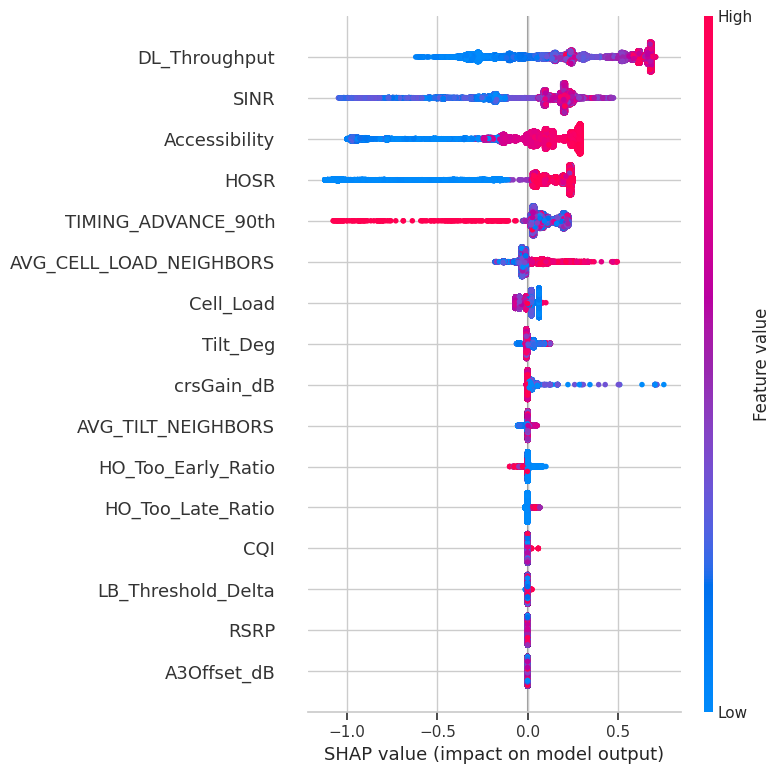

UPTILT


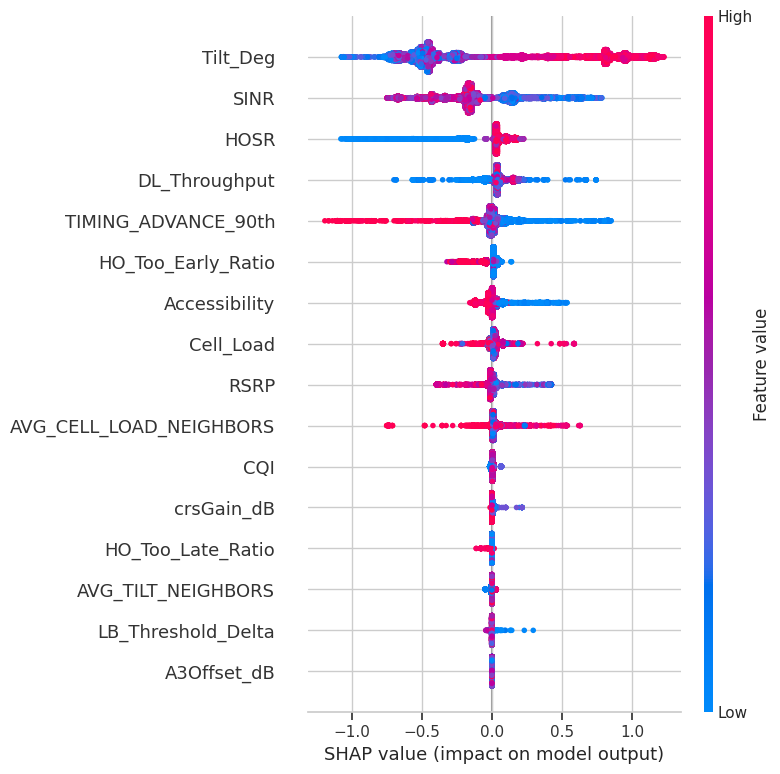

UPTILT_NEIGHBOR


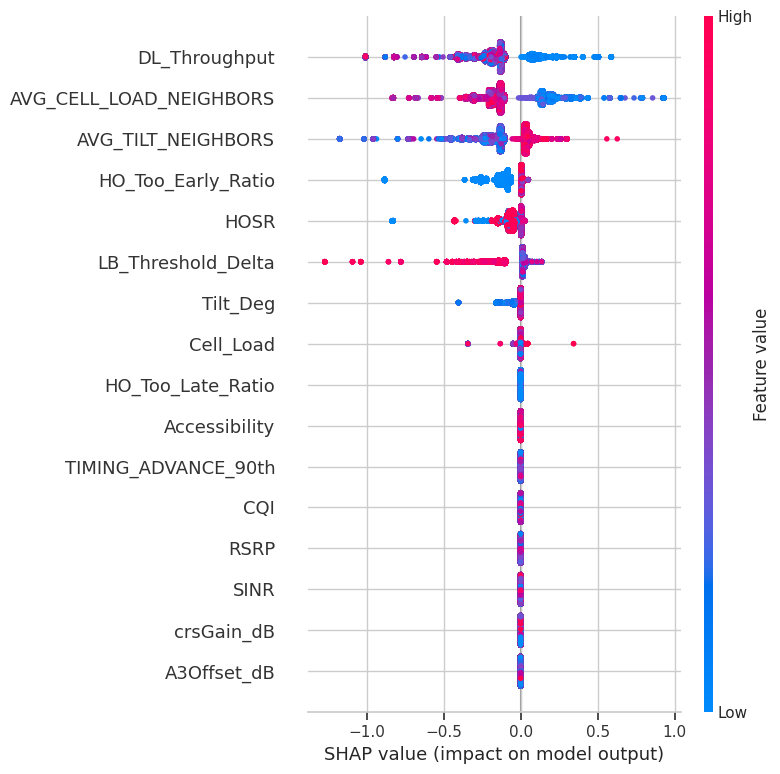

In [29]:
# ==============================================================================
# PART 4: EXPLAINABILITY (SHAP)
# ==============================================================================
print("\n[4] Explainability: Why did the model choose this action?")


# Initialize JS visualization
shap.initjs()

# Use the XGBoost model from your previous step (assuming 'xgb' variable exists)
# Create explainer
explainer = shap.TreeExplainer(xgb) # Replace 'xgb' with your actual model variable name
shap_values = explainer.shap_values(X_test)
selected_shap_values = None

# 3. Handle potential shape mismatches (common in multi-class cases)
i = 0
for _class in le.classes_:
    print(_class)
    if isinstance(shap_values, list):
        # Multi-class case: Select the matrix for the specific class
        print(f"Detected multi-class SHAP list with {len(shap_values)} classes.")
        selected_shap_values = shap_values[i]
    
    elif len(shap_values.shape) == 3:
        # Some versions return (samples, features, classes) or (classes, samples, features)
        # We need (samples, features)
        if shap_values.shape[0] == X_test.shape[0]:
            # It's (samples, features, classes)
            selected_shap_values = shap_values[:, :, i]
        else:
            # It's (classes, samples, features)
            selected_shap_values = shap_values[i]
    else:
        # Binary or Single-output case
        selected_shap_values = shap_values

    # 4. Final verification before plotting
    if selected_shap_values.shape != X_test.shape:
        raise ValueError(f"Dimension Mismatch: SHAP {selected_shap_values.shape} vs X_test {X_test.shape}")

    # 5. Plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        selected_shap_values, 
        X_test, 
        plot_type="dot"
    )
    i += 1